In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pingouin as pg
import os
import pandas as pdconda 
from sklearn.utils import resample

In [2]:
base_dir = os.getcwd()

1. Load annotations

In [3]:
## LPD
df_sz_lpd = pd.read_csv(base_dir[:-4]+'data/annotations/LPDS_SZ_3_2025.csv')
df_lb_lpd = pd.read_csv(base_dir[:-4]+'data/annotations/LPDS_LB_2_2025.csv')
df_ph_lpd = pd.read_csv(base_dir[:-4]+'data/annotations/LPDS_PH_3_3025.csv')

## GPD
df_sz_gpd = pd.read_csv(base_dir[:-4]+'data/annotations/GPDS_SZ_3_2025.csv')
df_lb_gpd = pd.read_csv(base_dir[:-4]+'data/annotations/GPDS_LB_2_2025.csv')
df_ph_gpd = pd.read_csv(base_dir[:-4]+'data/annotations/GPDS_PH_3_2025.csv')

##LRDA
df_sz_lrda = pd.read_csv(base_dir[:-4]+'data/annotations/LRDA_SZ_3_2025.csv')
df_lb_lrda = pd.read_csv(base_dir[:-4]+'data/annotations/LRDA_LB_2_2025.csv')
df_ph_lrda = pd.read_csv(base_dir[:-4]+'data/annotations/LRDA_PH_3_2025.csv')

#GRDA
df_sz_grda = pd.read_csv(base_dir[:-4]+'data/annotations/GRDA_SZ_3_2025.csv')
df_lb_grda = pd.read_csv(base_dir[:-4]+'data/annotations/GRDA_LB_2_2025.csv')
df_ph_grda = pd.read_csv(base_dir[:-4]+'data/annotations/GRDA_PH_3_2025.csv')

2. Rearrange data for analysis, identifying each annotator

In [4]:
## LPD
df_lb_lpd['files'] = df_lb_lpd['files'].apply(os.path.basename).str.extract(r'(.*?)(?:_score\.png)?$')[0]
df_sz_lpd['files'] = df_sz_lpd['files'].apply(os.path.basename).str.extract(r'(.*?)(?:_score\.png)?$')[0]
df_ph_lpd['files'] = df_ph_lpd['files'].apply(os.path.basename).str.extract(r'(.*?)(?:_score\.png)?$')[0]
df_lb_lpd = df_lb_lpd.rename(columns={'frequency':'frequency_lb',
                                      'spatial':'spatial_lb',
                                      'spatial_area':'spatial_area_lb'})
df_sz_lpd = df_sz_lpd.drop(columns=['spatial_original','spatial_area_original'])
df_sz_lpd = df_sz_lpd.rename(columns={'frequency':'frequency_sz',
                                    'spatial':'spatial_sz',
                                    'spatial_area':'spatial_area_sz'})
df_ph_lpd = df_ph_lpd.drop(columns=['spatial_origin'])
df_ph_lpd = df_ph_lpd.rename(columns={'frequency':'frequency_ph',
                                    'spatial':'spatial_ph',
                                    'spatial_area':'spatial_area_ph'})

## GPD
df_lb_gpd['files'] = df_lb_gpd['files'].apply(os.path.basename).str.extract(r'(.*?)(?:_score\.png)?$')[0]
df_sz_gpd['files'] = df_sz_gpd['files'].apply(os.path.basename).str.extract(r'(.*?)(?:_score\.png)?$')[0]
df_ph_gpd['files'] = df_sz_gpd['files'].apply(os.path.basename).str.extract(r'(.*?)(?:_score\.png)?$')[0]

df_lb_gpd = df_lb_gpd.rename(columns={'frequency':'frequency_lb',
                                      'spatial':'spatial_lb',
                                      'spatial_area':'spatial_area_lb'})
df_sz_gpd = df_sz_gpd.drop(columns=['spatial_origin','spatial_area_origin'])
df_sz_gpd = df_sz_gpd.rename(columns={'frequency':'frequency_sz',
                                    'spatial':'spatial_sz',
                                    'spatial_area':'spatial_area_sz'})
df_ph_gpd = df_ph_gpd.rename(columns={'frequency':'frequency_ph',
                                      'spatial':'spatial_ph',
                                      'spatial_area':'spatial_area_ph'})

## LRDA
df_lb_lrda['files'] = df_lb_lrda['files'].apply(os.path.basename).str.extract(r'(.*?)(?:_score\.png)?$')[0]
df_sz_lrda['files'] = df_sz_lrda['files'].apply(os.path.basename).str.extract(r'(.*?)(?:_score\.png)?$')[0]
df_ph_lrda['files'] = df_ph_lrda['files'].apply(os.path.basename).str.extract(r'(.*?)(?:_score\.png)?$')[0]

df_lb_lrda = df_lb_lrda.rename(columns={'frequency':'frequency_lb',
                                      'spatial':'spatial_lb',
                                      'spatial_area':'spatial_area_lb'})
df_sz_lrda = df_sz_lrda.drop(columns=['spatial_origin','spatial_area_origin'])
df_sz_lrda = df_sz_lrda.rename(columns={'frequency':'frequency_sz',
                                    'spatial':'spatial_sz',
                                    'spatial_area':'spatial_area_sz'})
df_ph_lrda = df_ph_lrda.drop(columns=['spatial_origin','birds'])
df_ph_lrda = df_ph_lrda.rename(columns={'frequency':'frequency_ph',
                                    'spatial':'spatial_ph',
                                    'spatial_area':'spatial_area_ph'})

## GRDA
df_lb_grda['files'] = df_lb_grda['files'].apply(os.path.basename).str.extract(r'(.*?)(?:_score\.png)?$')[0]
df_sz_grda['files'] = df_sz_grda['files'].apply(os.path.basename).str.extract(r'(.*?)(?:_score\.png)?$')[0]
df_ph_grda['files'] = df_ph_grda['files'].apply(os.path.basename).str.extract(r'(.*?)(?:_score\.png)?$')[0]
df_lb_grda = df_lb_grda.rename(columns={'frequency':'frequency_lb',
                                      'spatial':'spatial_lb',
                                      'spatial_area':'spatial_area_lb'})
df_sz_grda = df_sz_grda.drop(columns=['spatial_origin','spatial_area_origin'])
df_sz_grda = df_sz_grda.rename(columns={'frequency':'frequency_sz',
                                    'spatial':'spatial_sz',
                                    'spatial_area':'spatial_area_sz'})
df_ph_grda = df_ph_grda.rename(columns={'frequency':'frequency_ph',
                                    'spatial':'spatial_ph',
                                    'spatial_area':'spatial_area_ph'})

3. Merge all annotations into one file

In [5]:
df_lpd = pd.merge(df_sz_lpd,df_lb_lpd,on='files')
df_lpd = pd.merge(df_lpd,df_ph_lpd,on='files')

df_gpd = pd.merge(df_sz_gpd,df_lb_gpd,on='files')
df_gpd = pd.merge(df_gpd,df_ph_gpd,on='files')

df_lrda = pd.merge(df_sz_lrda,df_lb_lrda,on='files')
df_lrda = pd.merge(df_lrda,df_ph_lrda,on='files')

df_grda = pd.merge(df_sz_grda,df_lb_grda,on='files')
df_grda = pd.merge(df_grda,df_ph_grda,on='files',how='left')

4. All annotated values are rounded

In [6]:
df_lpd['spatial_sz'] = df_lpd['spatial_sz'].round(2)
df_lpd['spatial_lb'] = df_lpd['spatial_lb'].round(2)
df_lpd['spatial_ph'] = df_lpd['spatial_ph'].round(2)

df_gpd['spatial_sz'] = df_gpd['spatial_sz'].round(2)
df_gpd['spatial_lb'] = df_gpd['spatial_lb'].round(2)
df_gpd['spatial_ph'] = df_gpd['spatial_ph'].round(2)

df_lrda['spatial_sz'] = df_lrda['spatial_sz'].round(2)
df_lrda['spatial_lb'] = df_lrda['spatial_lb'].round(2)
df_lrda['spatial_ph'] = df_lrda['spatial_ph'].round(2)

df_grda['spatial_sz'] = df_grda['spatial_sz'].round(2)
df_grda['spatial_lb'] = df_grda['spatial_lb'].round(2)
df_grda['spatial_ph'] = df_grda['spatial_ph'].round(2)

5. Load algorithm results

In [7]:
## LPD
df_lpd_results = pd.read_csv(base_dir[:-4]+'results/lpd_results.csv')
df_lpd_results = df_lpd_results.drop(columns=['Unnamed: 0','event_type'])
df_lpd_results = df_lpd_results.rename(columns={'freq':'frequency_detector',
                                                'spatial':'spatial_detector',
                                                'spatial_areas':'spatial_areas_detector'})
df_lpd = pd.merge(df_lpd,df_lpd_results,on='files')

## GPD
df_gpd_results = pd.read_csv(base_dir[:-4]+'results/gpd_results.csv')
df_gpd_results = df_gpd_results.drop(columns=['Unnamed: 0','event_type'])
df_gpd_results = df_gpd_results.rename(columns={'freq':'frequency_detector',
                                                'spatial':'spatial_detector',
                                                'spatial_areas':'spatial_areas_detector'})
df_gpd = pd.merge(df_gpd,df_gpd_results,on='files')

## LRDA
df_lrda_results = pd.read_csv(base_dir[:-4]+'results/lrda_results.csv')
df_lrda_results = df_lrda_results.drop(columns=['Unnamed: 0','event_type_rda2_hhtt','event_type_rda1b_fft','event_type_rda1a_fft'])
df_lrda_results = df_lrda_results.rename(columns={'freq':'frequency_detector',
                                                'spatial':'spatial_detector',
                                                'spatial_areas':'spatial_areas_detector'})
df_lrda = pd.merge(df_lrda,df_lrda_results,on='files',how='left')

## GRDA
df_grda_results = pd.read_csv(base_dir[:-4]+'results/grda_results.csv')
df_grda_results = df_grda_results.drop(columns=['Unnamed: 0','event_type_rda2_hhtt','event_type_rda1b_fft','event_type_rda1a_fft'])
df_grda_results = df_grda_results.rename(columns={'freq':'frequency_detector',
                                                'spatial':'spatial_detector',
                                                'spatial_areas':'spatial_areas_detector'})
df_grda = pd.merge(df_grda,df_grda_results,on='files',how='left')

6. Merge annotations with algorithm results

In [8]:
## LPD
annot_lpd_freq = {
    'Annot 1':df_lpd['frequency_sz'],
    'Annot 2':df_lpd['frequency_lb'],
    'Annot 3':df_lpd['frequency_ph'],
    'PD1':df_lpd['frequency_detector'],
    'PD2a':df_lpd['freq_apd'],
    'PD2b':df_lpd['freq_zscore']
}
df_annot_lpd_freq = pd.DataFrame(annot_lpd_freq)
df_annot_lpd_freq = pd.melt(df_annot_lpd_freq,var_name='rater',value_name='annotation')
df_annot_lpd_freq['segment'] = df_annot_lpd_freq.groupby('rater').cumcount()+1
df_annot_lpd_freq['type'] = ['freq']*len(df_annot_lpd_freq)

annot_lpd_spatial = {
    'Annot 1':df_lpd['spatial_sz'],
    'Annot 2':df_lpd['spatial_lb'],
    'Annot 3':df_lpd['spatial_ph'],
    'PD1':df_lpd['spatial_detector'],
    'PD2a':df_lpd['spatial_apd'],
    'PD2b':df_lpd['spatial_zscore'],
}
df_annot_lpd_spatial = pd.DataFrame(annot_lpd_spatial)
df_annot_lpd_spatial = pd.melt(df_annot_lpd_spatial,var_name='rater',value_name='annotation')
df_annot_lpd_spatial['segment'] = df_annot_lpd_spatial.groupby('rater').cumcount()+1
df_annot_lpd_spatial['type'] = ['spatial']*len(df_annot_lpd_spatial)

df_annot_lpd_freq_agreement = pd.DataFrame(annot_lpd_freq)

df_annot_lpd_freq_agreement.loc[df_annot_lpd_freq_agreement['Annot 1']>0,'Annot 1'] = 1
df_annot_lpd_freq_agreement.loc[df_annot_lpd_freq_agreement['Annot 2']>0,'Annot 2'] = 1
df_annot_lpd_freq_agreement.loc[df_annot_lpd_freq_agreement['Annot 3']>0,'Annot 3'] = 1
df_annot_lpd_freq_agreement.loc[df_annot_lpd_freq_agreement['Annot 1']==0,'Annot 1'] = 0
df_annot_lpd_freq_agreement.loc[df_annot_lpd_freq_agreement['Annot 2']==0,'Annot 2'] = 0
df_annot_lpd_freq_agreement.loc[df_annot_lpd_freq_agreement['Annot 3']==0,'Annot 3'] = 0

## GPD
annot_gpd_freq = {
    'Annot 1':df_gpd['frequency_sz'],
    'Annot 2':df_gpd['frequency_lb'],
    'Annot 3':df_gpd['frequency_ph'],
    'PD1':df_gpd['frequency_detector'],
    'PD2a':df_gpd['freq_apd'],
    'PD2b':df_gpd['freq_zscore']
}
df_annot_gpd_freq = pd.DataFrame(annot_gpd_freq)
df_annot_gpd_freq = pd.melt(df_annot_gpd_freq,var_name='rater',value_name='annotation')
df_annot_gpd_freq['segment'] = df_annot_gpd_freq.groupby('rater').cumcount()+1
df_annot_gpd_freq['type'] = ['freq']*len(df_annot_gpd_freq)

annot_gpd_spatial = {
    'Annot 1':df_gpd['spatial_sz'],
    'Annot 2':df_gpd['spatial_lb'],
    'Annot 3':df_gpd['spatial_ph'],
    'PD1':df_gpd['spatial_detector'],
    'PD2a':df_gpd['spatial_apd'],
    'PD2b':df_gpd['spatial_zscore']
}
df_annot_gpd_spatial = pd.DataFrame(annot_gpd_spatial)
df_annot_gpd_spatial = pd.melt(df_annot_gpd_spatial,var_name='rater',value_name='annotation')
df_annot_gpd_spatial['segment'] = df_annot_gpd_spatial.groupby('rater').cumcount()+1
df_annot_gpd_spatial['type'] = ['spatial']*len(df_annot_gpd_spatial)

df_annot_gpd_freq_agreement = pd.DataFrame(annot_gpd_freq)

df_annot_gpd_freq_agreement.loc[df_annot_gpd_freq_agreement['Annot 1']>0,'Annot 1'] = 1
df_annot_gpd_freq_agreement.loc[df_annot_gpd_freq_agreement['Annot 2']>0,'Annot 2'] = 1
df_annot_gpd_freq_agreement.loc[df_annot_gpd_freq_agreement['Annot 3']>0,'Annot 3'] = 1
df_annot_gpd_freq_agreement.loc[df_annot_gpd_freq_agreement['Annot 1']==0,'Annot 1'] = 0
df_annot_gpd_freq_agreement.loc[df_annot_gpd_freq_agreement['Annot 2']==0,'Annot 2'] = 0
df_annot_gpd_freq_agreement.loc[df_annot_gpd_freq_agreement['Annot 3']==0,'Annot 3'] = 0
df_annot_gpd_freq_agreement = df_annot_gpd_freq_agreement.drop_duplicates()

## LRDA
annot_lrda_freq = {
    'Annot 1':df_lrda['frequency_sz'],
    'Annot 2':df_lrda['frequency_lb'],
    'Annot 3':df_lrda['frequency_ph'],
    'RDA1b-FFT':df_lrda['freq_rda1b_fft'],
    'RDA1a-FFT':df_lrda['freq_rda1a_fft'],
    'RDA2-HHT':df_lrda['freq_rda2_hhtt']
}
df_annot_lrda_freq = pd.DataFrame(annot_lrda_freq)
df_annot_lrda_freq = pd.melt(df_annot_lrda_freq,var_name='rater',value_name='annotation')
df_annot_lrda_freq['segment'] = df_annot_lrda_freq.groupby('rater').cumcount()+1
df_annot_lrda_freq['type'] = ['freq']*len(df_annot_lrda_freq)

annot_lrda_spatial = {
    'Annot 1':df_lrda['spatial_sz'],
    'Annot 2':df_lrda['spatial_lb'],
    'Annot 3':df_lrda['spatial_ph'],
    'RDA2-HHT':df_lrda['spatial_rda2_hhtt'],
    'RDA1b-FFT':df_lrda['spatial_rda1b_fft'],
    'RDA1a-FFT':df_lrda['spatial_rda1a_fft']
}
df_annot_lrda_spatial = pd.DataFrame(annot_lrda_spatial)
df_annot_lrda_spatial = pd.melt(df_annot_lrda_spatial,var_name='rater',value_name='annotation')
df_annot_lrda_spatial['segment'] = df_annot_lrda_spatial.groupby('rater').cumcount()+1
df_annot_lrda_spatial['type'] = ['spatial']*len(df_annot_lrda_spatial)

df_annot_lrda_freq_agreement = pd.DataFrame(annot_lrda_freq)

df_annot_lrda_freq_agreement.loc[df_annot_lrda_freq_agreement['Annot 1']>0,'Annot 1'] = 1
df_annot_lrda_freq_agreement.loc[df_annot_lrda_freq_agreement['Annot 2']>0,'Annot 2'] = 1
df_annot_lrda_freq_agreement.loc[df_annot_lrda_freq_agreement['Annot 3']>0,'Annot 3'] = 1
df_annot_lrda_freq_agreement.loc[df_annot_lrda_freq_agreement['Annot 1']==0,'Annot 1'] = 0
df_annot_lrda_freq_agreement.loc[df_annot_lrda_freq_agreement['Annot 2']==0,'Annot 2'] = 0
df_annot_lrda_freq_agreement.loc[df_annot_lrda_freq_agreement['Annot 3']==0,'Annot 3'] = 0


df_annot_lrda_freq_agreement = df_annot_lrda_freq_agreement.drop_duplicates()

## GRDA
annot_grda_freq = {
    'Annot 1':df_grda['frequency_sz'],
    'Annot 2':df_grda['frequency_lb'],
    'Annot 3':df_grda['frequency_ph'],
    'RDA2-HHT':df_grda['freq_rda2_hhtt'],
    'RDA1b-FFT':df_grda['freq_rda1b_fft'],
    'RDA1a-FFT':df_grda['freq_rda1a_fft']
}
df_annot_grda_freq = pd.DataFrame(annot_grda_freq)
df_annot_grda_freq = pd.melt(df_annot_grda_freq,var_name='rater',value_name='annotation')
df_annot_grda_freq['segment'] = df_annot_grda_freq.groupby('rater').cumcount()+1
df_annot_grda_freq['type'] = ['freq']*len(df_annot_grda_freq)

annot_grda_spatial = {
    'Annot 1':df_grda['spatial_sz'],
    'Annot 2':df_grda['spatial_lb'],
    'Annot 3':df_grda['spatial_ph'],
    'RDA2-HHT':df_grda['spatial_rda2_hhtt'],
    'RDA1b-FFT':df_grda['spatial_rda1b_fft'],
    'RDA1a-FFT':df_grda['spatial_rda1a_fft']
}
df_annot_grda_spatial = pd.DataFrame(annot_grda_spatial)
df_annot_grda_spatial = pd.melt(df_annot_grda_spatial,var_name='rater',value_name='annotation')
df_annot_grda_spatial['segment'] = df_annot_grda_spatial.groupby('rater').cumcount()+1
df_annot_grda_spatial['type'] = ['spatial']*len(df_annot_grda_spatial)

df_annot_grda_freq_agreement = pd.DataFrame(annot_grda_freq)

df_annot_grda_freq_agreement.loc[df_annot_grda_freq_agreement['Annot 1']>0,'Annot 1'] = 1
df_annot_grda_freq_agreement.loc[df_annot_grda_freq_agreement['Annot 2']>0,'Annot 2'] = 1
df_annot_grda_freq_agreement.loc[df_annot_grda_freq_agreement['Annot 3']>0,'Annot 3'] = 1
df_annot_grda_freq_agreement.loc[df_annot_grda_freq_agreement['Annot 1']==0,'Annot 1'] = 0
df_annot_grda_freq_agreement.loc[df_annot_grda_freq_agreement['Annot 2']==0,'Annot 2'] = 0
df_annot_grda_freq_agreement.loc[df_annot_grda_freq_agreement['Annot 3']==0,'Annot 3'] = 0

#8
df_annot_grda_freq_agreement = df_annot_grda_freq_agreement.drop_duplicates()

7. exper-expert IRR - percent agreement on class annotations

In [9]:
## LPD
rater_sz_agreement_lb = np.mean(df_annot_lpd_freq_agreement['Annot 1'] == df_annot_lpd_freq_agreement['Annot 2'])
rater_sz_agreement_ph = np.mean(df_annot_lpd_freq_agreement['Annot 1'] == df_annot_lpd_freq_agreement['Annot 3'])  
rater_ph_agreement_lb = np.mean(df_annot_lpd_freq_agreement['Annot 3'] == df_annot_lpd_freq_agreement['Annot 2'])  


print(f"Annot 1 and Annot 2 agreement in terms of LPD classification: {rater_sz_agreement_lb * 100:.2f}%")
print(f"Annot 1 and Annot 3 agreement in terms of LPD classification: {rater_sz_agreement_ph * 100:.2f}%")
print(f"Annot 3 and Annot 2 agreement in terms of LPD classification: {rater_ph_agreement_lb * 100:.2f}%")

print('#'*70)
## GPD
rater_sz_agreement_lb = np.mean(df_annot_gpd_freq_agreement['Annot 1'] == df_annot_gpd_freq_agreement['Annot 2'])  
rater_sz_agreement_ph = np.mean(df_annot_gpd_freq_agreement['Annot 1'] == df_annot_gpd_freq_agreement['Annot 3'])
rater_ph_agreement_lb = np.mean(df_annot_gpd_freq_agreement['Annot 3'] == df_annot_gpd_freq_agreement['Annot 2'])

print(f"Annot 1 and Annot 2 agreement in terms of GPD classification: {rater_sz_agreement_lb * 100:.2f}%")
print(f"Annot 1 and Annot 3 agreement in terms of GPD classification: {rater_sz_agreement_ph * 100:.2f}%")
print(f"Annot 3 and Annot 2 agreement in terms of GPD classification: {rater_ph_agreement_lb * 100:.2f}%")

print('#'*70)
## LRDA
rater_sz_agreement_lb = np.mean(df_annot_lrda_freq_agreement['Annot 1'] == df_annot_lrda_freq_agreement['Annot 2'])
rater_sz_agreement_ph = np.mean(df_annot_lrda_freq_agreement['Annot 1'] == df_annot_lrda_freq_agreement['Annot 3'])  
rater_ph_agreement_lb = np.mean(df_annot_lrda_freq_agreement['Annot 3'] == df_annot_lrda_freq_agreement['Annot 2'])  

print(f"Annot 1 and Annot 2 agreement in terms of LRDA classification: {rater_sz_agreement_lb * 100:.2f}%")
print(f"Annot 1 and Annot 3 agreement in terms of LRDA classification: {rater_sz_agreement_ph * 100:.2f}%")
print(f"Annot 3 and Annot 2 agreement in terms of LRDA classification: {rater_ph_agreement_lb * 100:.2f}%")

print('#'*70)
## GRDA
rater_sz_agreement_lb = np.mean(df_annot_grda_freq_agreement['Annot 1'] == df_annot_grda_freq_agreement['Annot 2'])
rater_sz_agreement_ph = np.mean(df_annot_grda_freq_agreement['Annot 1'] == df_annot_grda_freq_agreement['Annot 3'])  
rater_ph_agreement_lb = np.mean(df_annot_grda_freq_agreement['Annot 3'] == df_annot_grda_freq_agreement['Annot 2'])  

print(f"Annot 1 and Annot 2 agreement in terms of GRDA classification: {rater_sz_agreement_lb * 100:.2f}%")
print(f"Annot 1 and Annot 3 agreement in terms of GRDA classification: {rater_sz_agreement_ph * 100:.2f}%")
print(f"Annot 3 and Annot 2 agreement in terms of GRDA classification: {rater_ph_agreement_lb * 100:.2f}%")

Annot 1 and Annot 2 agreement in terms of LPD classification: 69.89%
Annot 1 and Annot 3 agreement in terms of LPD classification: 44.98%
Annot 3 and Annot 2 agreement in terms of LPD classification: 74.35%
######################################################################
Annot 1 and Annot 2 agreement in terms of GPD classification: 44.26%
Annot 1 and Annot 3 agreement in terms of GPD classification: 36.82%
Annot 3 and Annot 2 agreement in terms of GPD classification: 92.57%
######################################################################
Annot 1 and Annot 2 agreement in terms of LRDA classification: 22.81%
Annot 1 and Annot 3 agreement in terms of LRDA classification: 21.93%
Annot 3 and Annot 2 agreement in terms of LRDA classification: 99.12%
######################################################################
Annot 1 and Annot 2 agreement in terms of GRDA classification: 45.50%
Annot 1 and Annot 3 agreement in terms of GRDA classification: 40.00%
Annot 3 and Annot 2 agr

8. IRR - expert-expert/expert-algorithm

LPD & GPD

ICC

In [10]:
df_annot_gpd_spatial = pd.DataFrame(annot_gpd_spatial)
df_annot_gpd_freq = pd.DataFrame(annot_gpd_freq)
df_annot_lpd_spatial = pd.DataFrame(annot_lpd_spatial)
df_annot_lpd_freq = pd.DataFrame(annot_lpd_freq)

#df_annot_gpd_freq = df_annot_gpd_freq[(df_annot_gpd_freq['Annot 1']!=0) & (df_annot_gpd_freq['Annot 2']!=0) & (df_annot_gpd_freq['Annot 3']!=0)]
df_annot_gpd_freq = pd.melt(df_annot_gpd_freq,var_name='rater',value_name='annotation')
df_annot_gpd_freq['segment'] = df_annot_gpd_freq.groupby('rater').cumcount()+1
df_annot_gpd_freq['type'] = ['freq']*len(df_annot_gpd_freq)

#df_annot_lpd_freq = df_annot_lpd_freq[(df_annot_lpd_freq['Annot 1']!=0) & (df_annot_lpd_freq['Annot 2']!=0) & (df_annot_lpd_freq['Annot 3']!=0)]
df_annot_lpd_freq = pd.melt(df_annot_lpd_freq,var_name='rater',value_name='annotation')
df_annot_lpd_freq['segment'] = df_annot_lpd_freq.groupby('rater').cumcount()+1
df_annot_lpd_freq['type'] = ['freq']*len(df_annot_lpd_freq)

#df_annot_gpd_spatial = df_annot_gpd_spatial[(df_annot_gpd_spatial['Annot 1']!=0) & (df_annot_gpd_spatial['Annot 2']!=0) & (df_annot_gpd_spatial['Annot 3']!=0)]
df_annot_gpd_spatial = pd.melt(df_annot_gpd_spatial,var_name='rater',value_name='annotation')
df_annot_gpd_spatial['segment'] = df_annot_gpd_spatial.groupby('rater').cumcount()+1
df_annot_gpd_spatial['type'] = ['spatial']*len(df_annot_gpd_spatial)

#df_annot_lpd_spatial = df_annot_lpd_spatial[(df_annot_lpd_spatial['Annot 1']!=0) & (df_annot_lpd_spatial['Annot 2']!=0) & (df_annot_lpd_spatial['Annot 3']!=0)]
df_annot_lpd_spatial = pd.melt(df_annot_lpd_spatial,var_name='rater',value_name='annotation')
df_annot_lpd_spatial['segment'] = df_annot_lpd_spatial.groupby('rater').cumcount()+1
df_annot_lpd_spatial['type'] = ['spatial']*len(df_annot_lpd_spatial)


#ICC
icc3_pd_event_freq = []
icc3_pd_type_freq = []
icc3_pd_event_spatial = []
icc3_pd_type_spatial = []
icc3_pd_freq = []
icc3k_pd_freq = []
icc3_pd_spatial = []
icc3k_pd_spatial = []
icc3_ci_pd_freq = []
icc3k_ci_pd_freq = []
icc3_ci_pd_spatial = []
icc3k_ci_pd_spatial = []

df_list = [df_annot_lpd_freq,df_annot_gpd_freq, df_annot_lpd_spatial, df_annot_gpd_spatial ]
event = ['LPD','GPD','LPD','GPD']
fs = ['freq','freq','spatial','spatial']
algo_raters = ['PD1','PD2a','PD2b']

idx=0
for df in df_list:
    
    df_annot_icc_annotators = df.drop(columns=['type'])
    df_icc = df_annot_icc_annotators[df_annot_icc_annotators['rater'].isin(['Annot 1','Annot 2','Annot 3'])]

    icc = pg.intraclass_corr(data=df_icc, targets='segment', raters='rater', ratings='annotation',nan_policy='omit')
    

    if fs[idx]=='spatial':
        icc3_pd_spatial.append(icc.loc[icc['Type']=='ICC3','ICC'].values[0])
        icc3k_pd_spatial.append(icc.loc[icc['Type']=='ICC3k','ICC'].values[0])
        icc3_ci_pd_spatial.append(icc.loc[icc['Type']=='ICC3','CI95%'].values[0])
        icc3k_ci_pd_spatial.append(icc.loc[icc['Type']=='ICC3k','CI95%'].values[0])
        icc3_pd_type_spatial.append('annotators')
        icc3_pd_event_spatial.append(event[idx])

    if fs[idx]=='freq':
        icc3_pd_freq.append(icc.loc[icc['Type']=='ICC3','ICC'].values[0])
        icc3k_pd_freq.append(icc.loc[icc['Type']=='ICC3k','ICC'].values[0])
        icc3_ci_pd_freq.append(icc.loc[icc['Type']=='ICC3','CI95%'].values[0])
        icc3k_ci_pd_freq.append(icc.loc[icc['Type']=='ICC3k','CI95%'].values[0])
        icc3_pd_type_freq.append('annotators')
        icc3_pd_event_freq.append(event[idx])
        

    for algo_rater in algo_raters:
        df_icc_algo = df_annot_icc_annotators[df_annot_icc_annotators['rater'].isin(['Annot 1','Annot 2','Annot 3',algo_rater])]  
        
        icc = pg.intraclass_corr(data=df_icc_algo, targets='segment', raters='rater', ratings='annotation',nan_policy='omit')
        if fs[idx]=='spatial':
            icc3_pd_spatial.append(icc.loc[icc['Type']=='ICC3','ICC'].values[0])
            icc3k_pd_spatial.append(icc.loc[icc['Type']=='ICC3k','ICC'].values[0])
            icc3_ci_pd_spatial.append(icc.loc[icc['Type']=='ICC3','CI95%'].values[0])
            icc3k_ci_pd_spatial.append(icc.loc[icc['Type']=='ICC3k','CI95%'].values[0])
            icc3_pd_type_spatial.append(str('annotators'+'_'+algo_rater))
            icc3_pd_event_spatial.append(event[idx])
            
        if fs[idx]=='freq':
            icc3_pd_freq.append(icc.loc[icc['Type']=='ICC3','ICC'].values[0])
            icc3k_pd_freq.append(icc.loc[icc['Type']=='ICC3k','ICC'].values[0])
            icc3_ci_pd_freq.append(icc.loc[icc['Type']=='ICC3','CI95%'].values[0])
            icc3k_ci_pd_freq.append(icc.loc[icc['Type']=='ICC3k','CI95%'].values[0])
            icc3_pd_type_freq.append(str('annotators'+'_'+algo_rater))
            icc3_pd_event_freq.append(event[idx])
            
    idx+=1
    

/var/folders/93/dmr7m61x04n24v7hx7bsj8_w0000gp/T/ipykernel_63901/851734325.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
/var/folders/93/dmr7m61x04n24v7hx7bsj8_w0000gp/T/ipykernel_63901/851734325.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
/var/folders/93/dmr7m61x04n24v7hx7bsj8_w0000gp/T/ipykernel_63901/851734325.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
/var/folders/93/dmr7m61x04n24v7hx7bsj8_w0000gp/T/ipykernel_63901/851734325.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)


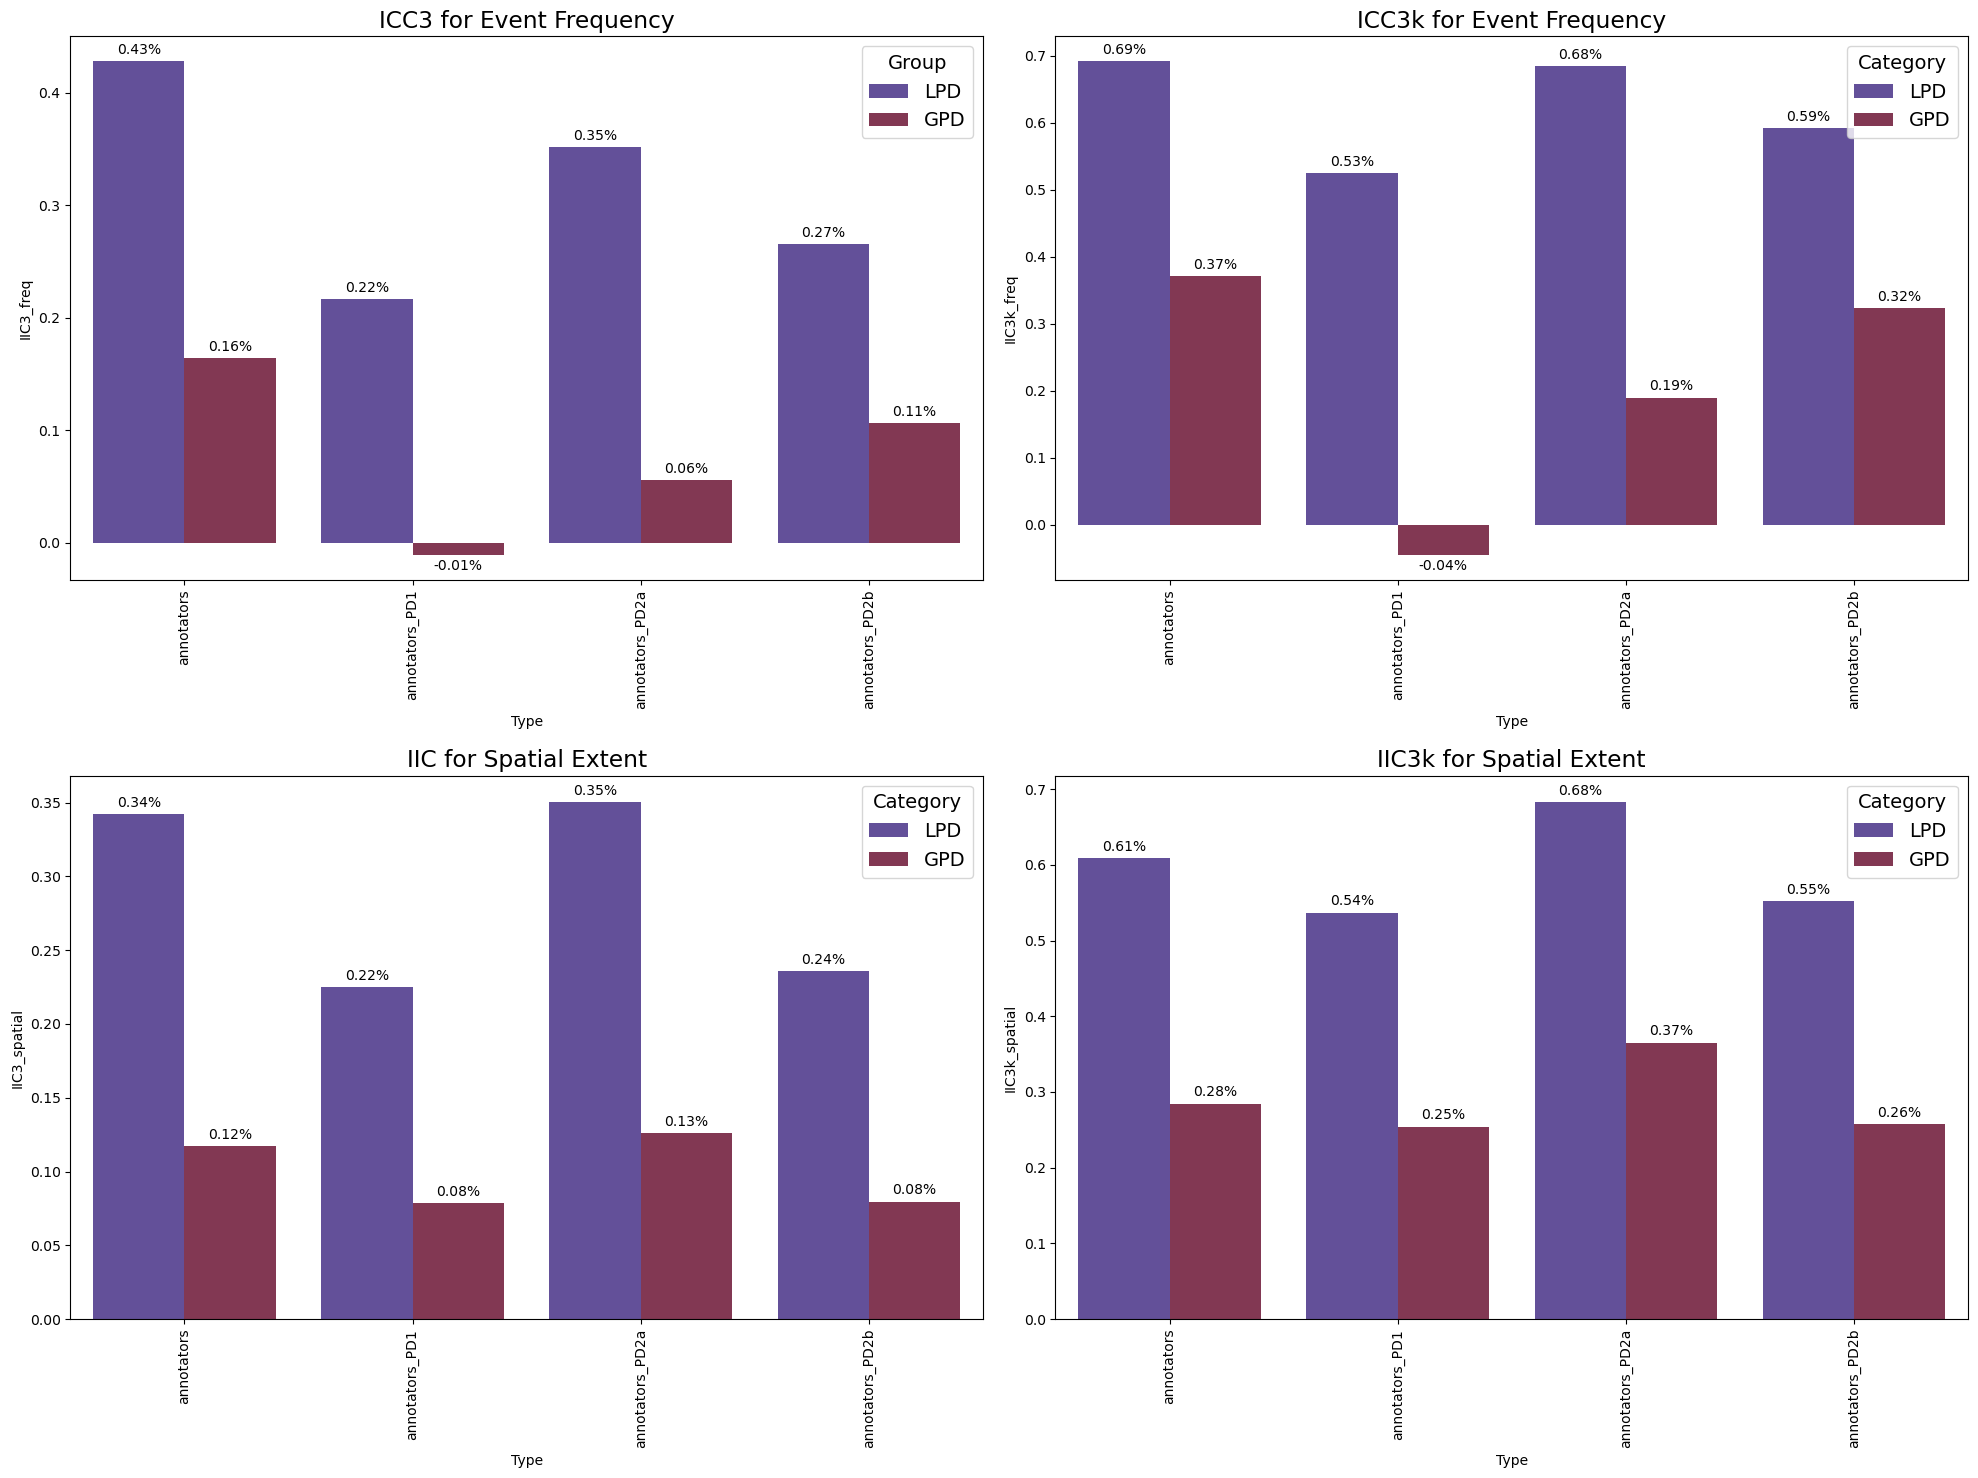

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample Data
df_plot = pd.DataFrame({
    'Type':icc3_pd_type_freq,
    'Event':icc3_pd_event_freq,
    'IIC3_freq':icc3_pd_freq,
    'IIC3k_freq':icc3k_pd_freq,
    'ICC3k_freq_CI':icc3k_ci_pd_freq,
    'IIC3_spatial':icc3_pd_spatial,
    'IIC3k_spatial':icc3k_pd_spatial,
    'IIC3k_spatial_CI':icc3k_ci_pd_spatial
})

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 15))  
plt.rcParams.update({'font.size': 14})


# First subplot
barplot = sns.barplot(x='Type', y='IIC3_freq', hue='Event', data=df_plot, ax=axes[0,0],palette="twilight")
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f%%', label_type='edge', fontsize=10, padding=3)

axes[0,0].set_title('ICC3 for Event Frequency')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
axes[0,0].legend(title='Group')




# Second subplot
barplot = sns.barplot(x='Type', y='IIC3k_freq', hue='Event', data=df_plot, ax=axes[0,1],palette="twilight")
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f%%', label_type='edge', fontsize=10, padding=3)

axes[0,1].set_title('ICC3k for Event Frequency')
axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
axes[0,1].legend(title='Category')


barplot = sns.barplot(x='Type', y='IIC3_spatial', hue='Event', data=df_plot, ax=axes[1,0],palette="twilight")
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f%%', label_type='edge', fontsize=10, padding=3)

axes[1,0].set_title('IIC for Spatial Extent')
axes[1,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
axes[1,0].legend(title='Category')

barplot = sns.barplot(x='Type', y='IIC3k_spatial', hue='Event', data=df_plot, ax=axes[1,1],palette="twilight")
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f%%', label_type='edge', fontsize=10, padding=3)

axes[1,1].set_title('IIC3k for Spatial Extent')
axes[1,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
axes[1,1].legend(title='Category')

plt.tight_layout()
plt.show()

Pairwise agreement

In [12]:
#Pairwise agreement
df_annot_gpd_spatial = pd.DataFrame(annot_gpd_spatial)
df_annot_gpd_freq = pd.DataFrame(annot_gpd_freq)
df_annot_lpd_spatial = pd.DataFrame(annot_lpd_spatial)
df_annot_lpd_freq = pd.DataFrame(annot_lpd_freq)



df_gpd_freq_cat = df_annot_gpd_freq
df_lpd_freq_cat = df_annot_lpd_freq
df_gpd_spatial_cat = df_annot_gpd_spatial
df_lpd_spatial_cat = df_annot_lpd_spatial

raters = ['Annot 1','Annot 3','Annot 2','PD1','PD2a','PD2b']
bins = [0,1,1.5,2,2.5,3,10]
labels = ['<1Hz','1-1.5Hz','1.5-2Hz','2-2.5Hz','2.5-3Hz','>3Hz']
for rater in raters:
    df_gpd_freq_cat[rater] = pd.cut(df_gpd_freq_cat[rater],bins=bins,labels=labels, include_lowest=True)
    df_lpd_freq_cat[rater] = pd.cut(df_annot_lpd_freq[rater],bins=bins,labels=labels, include_lowest=True)


bins = [0,0.25,0.50,0.75,1]
labels = ['1-4/18','5-10/18','11-14/18','15-18/18']
for rater in raters:
    df_gpd_spatial_cat[rater] = pd.cut(df_gpd_spatial_cat[rater],bins=bins,labels=labels, include_lowest=True)
    df_lpd_spatial_cat[rater] = pd.cut(df_lpd_spatial_cat[rater],bins=bins,labels=labels, include_lowest=True)

****************************************************************************************************
Pairwise agreement for:  LPD   spatial extent
Mean Inter-rater agreement:  0.4309895833333333  CI: 0.0   0.0
Mean Inter-rater agreement detector:  0.13020833333333334  CI: 0.0   0.0
Mean Inter-rater agreement apd:  0.5247395833333334  CI: 0.0   0.0
Mean Inter-rater agreement zscore:  0.12109375  CI: 0.0   0.0


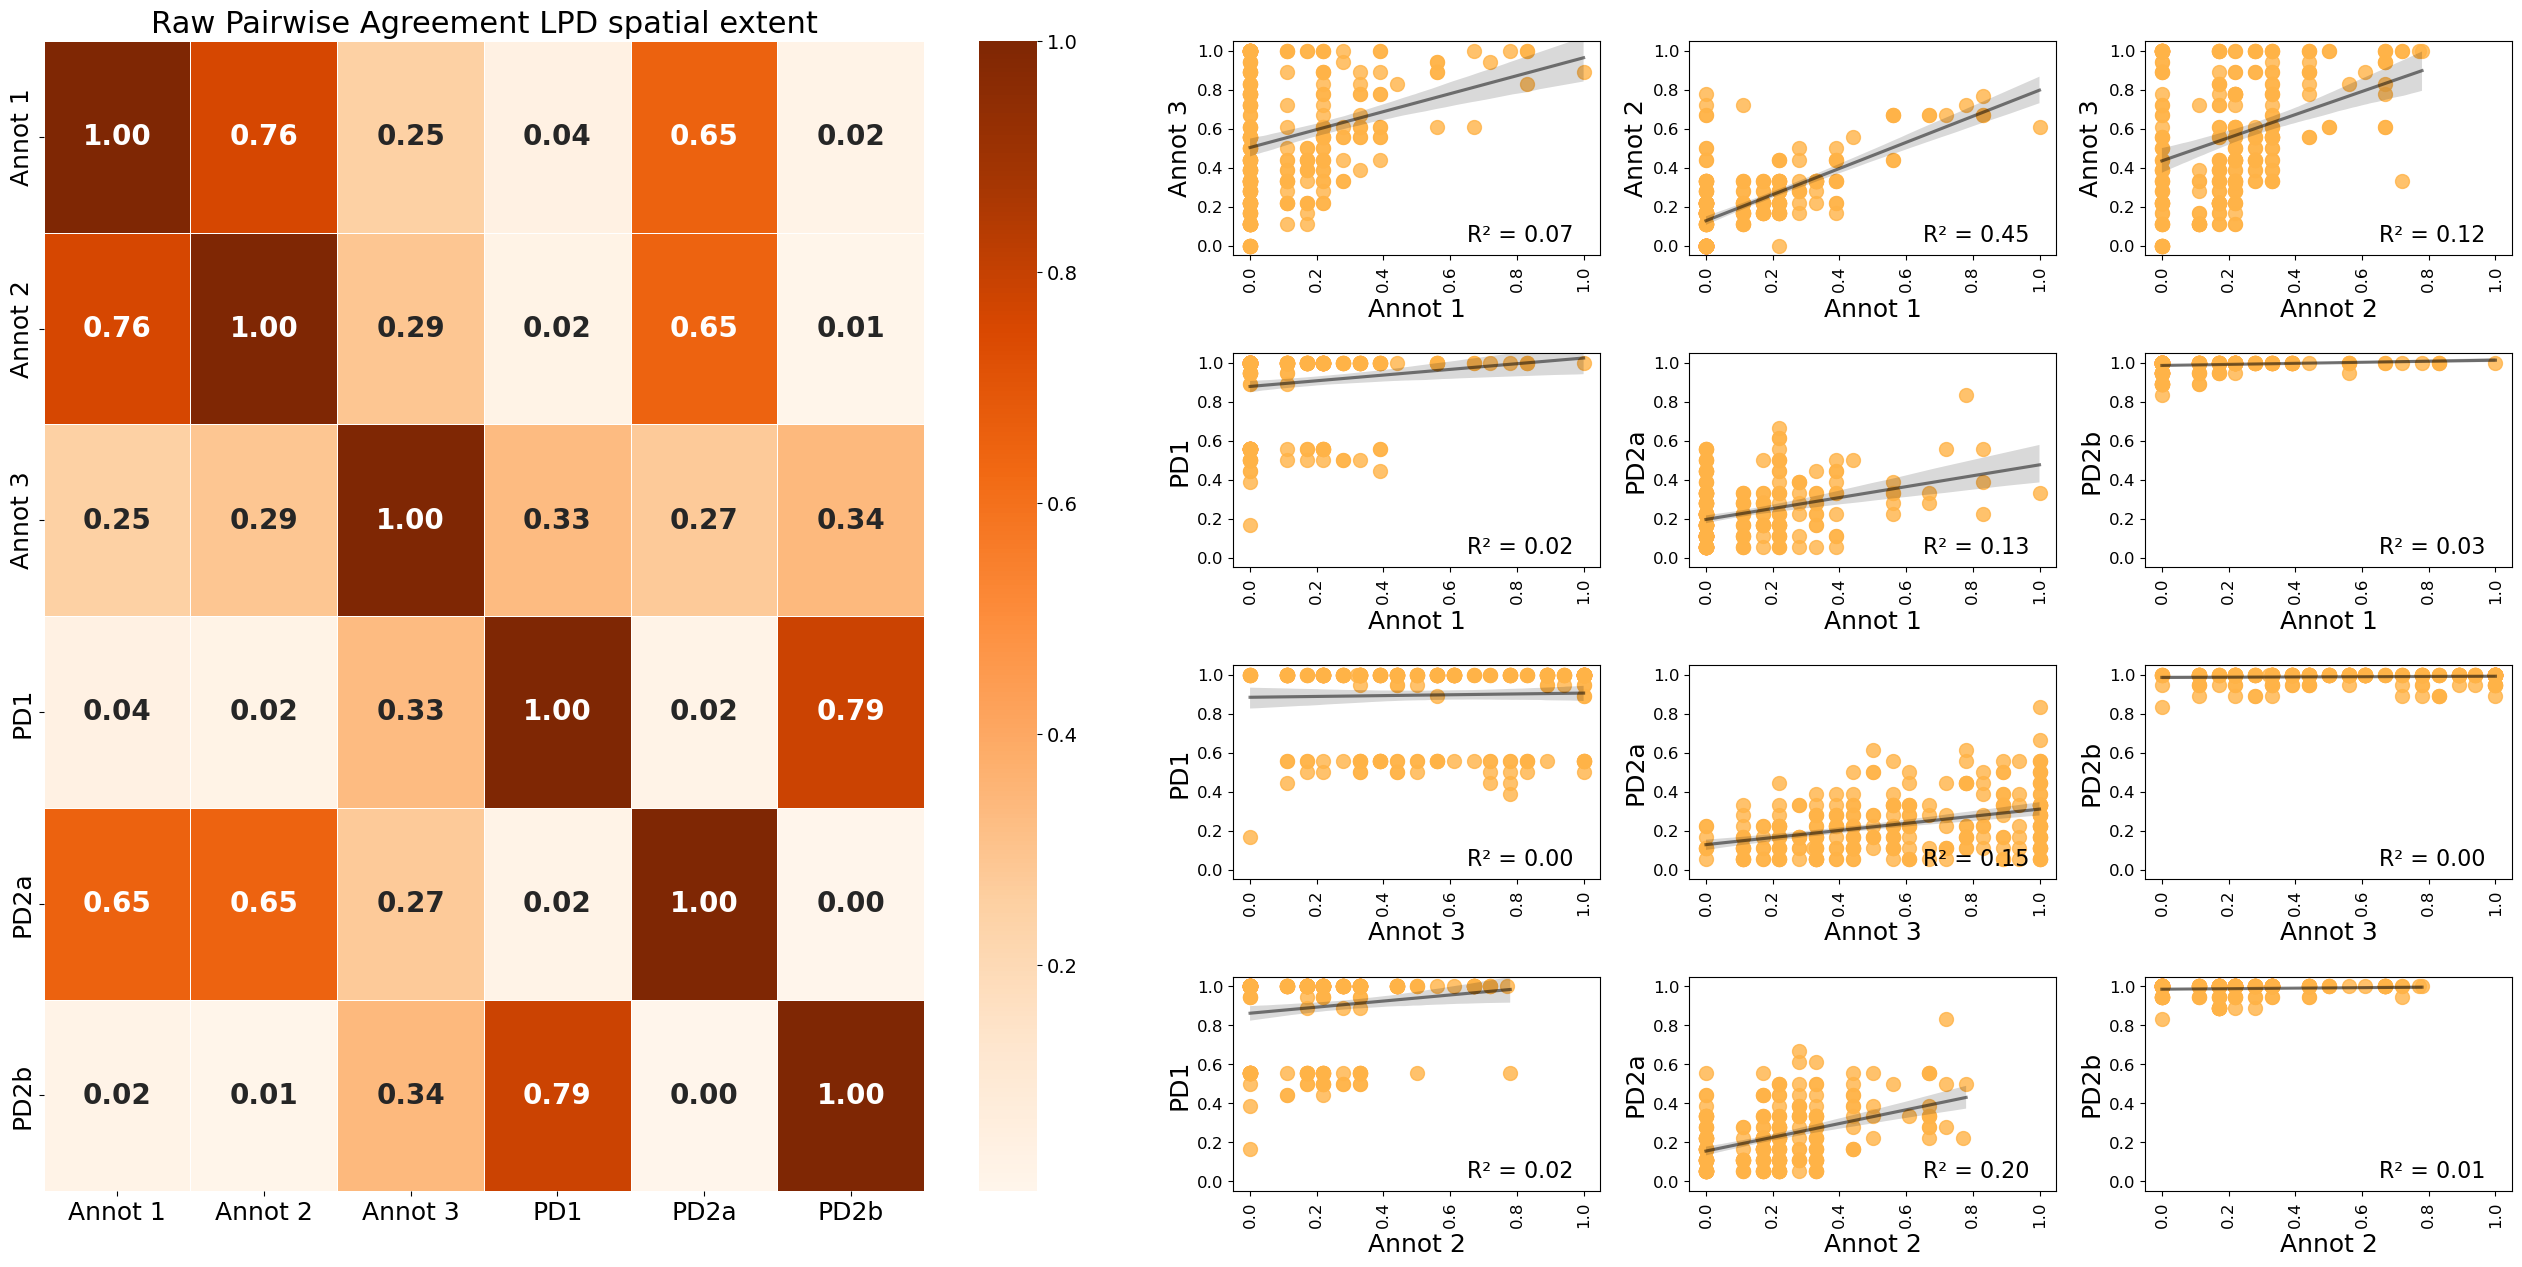

****************************************************************************************************
Pairwise agreement for:  GPD   spatial extent
Mean Inter-rater agreement:  0.5776255707762558  CI: 0.0   0.0
Mean Inter-rater agreement detector:  0.7659817351598174  CI: 0.0   0.0
Mean Inter-rater agreement apd:  0.19292237442922375  CI: 0.0   0.0
Mean Inter-rater agreement zscore:  0.7659817351598174  CI: 0.0   0.0


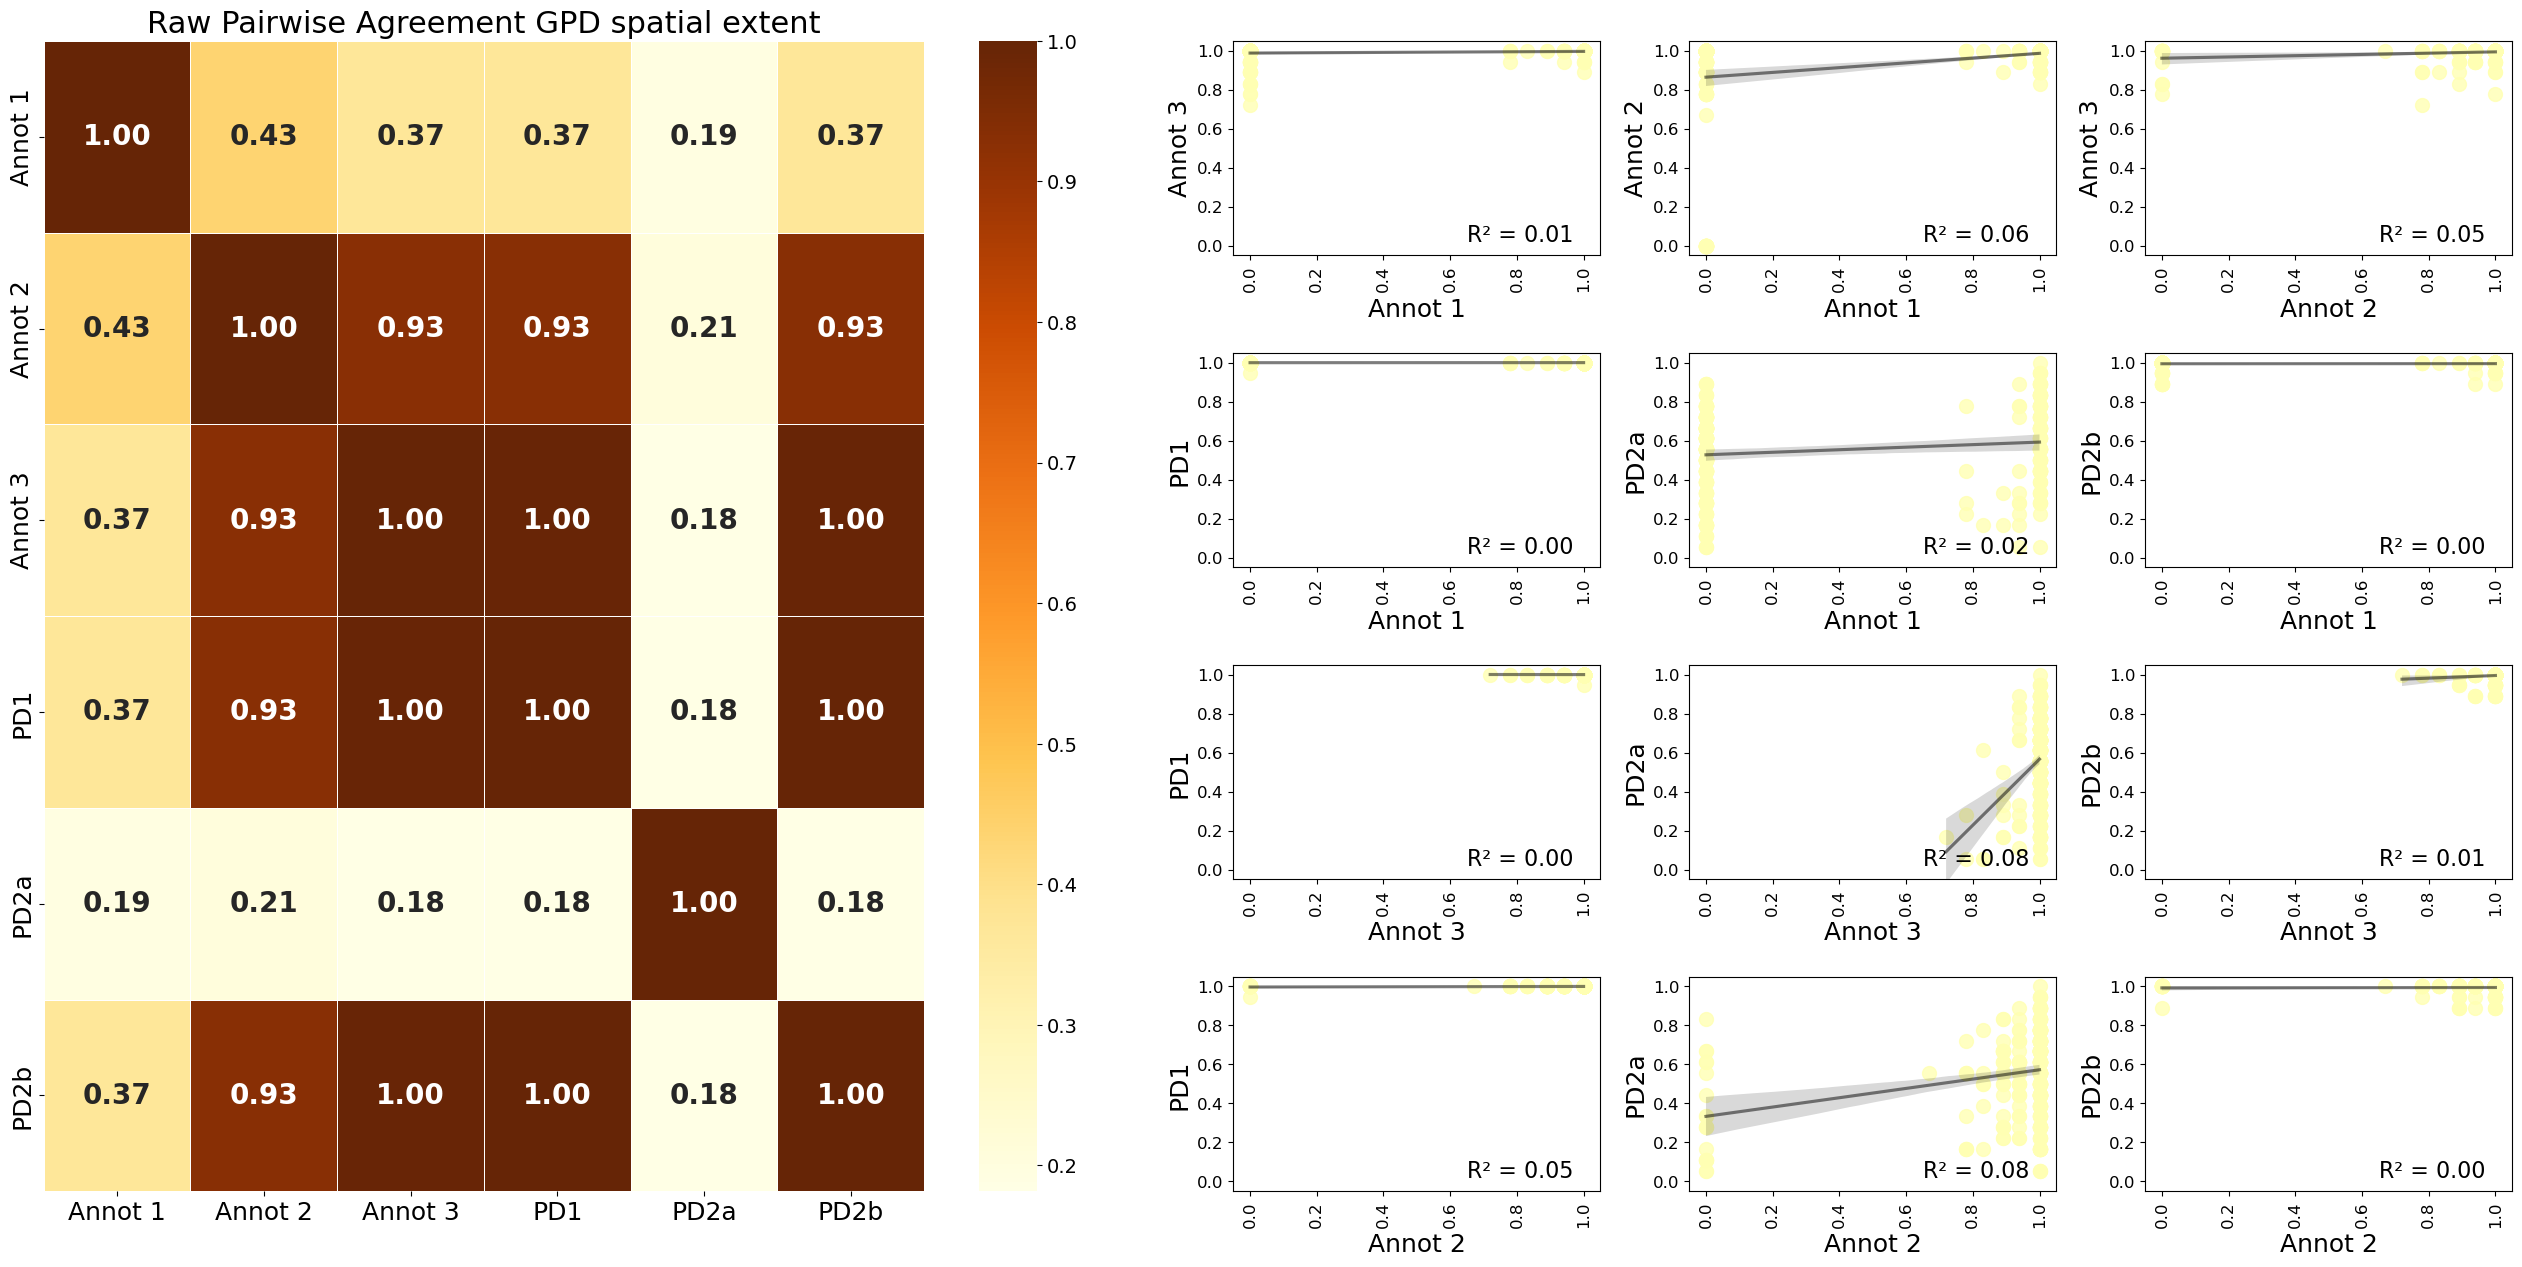

****************************************************************************************************
Pairwise agreement for:  LPD   frequency
Mean Inter-rater agreement:  0.6380208333333334  CI: 0.0   0.0
Mean Inter-rater agreement detector:  0.140625  CI: 0.0   0.0
Mean Inter-rater agreement apd:  0.63671875  CI: 0.0   0.0
Mean Inter-rater agreement zscore:  0.09375  CI: 0.0   0.0


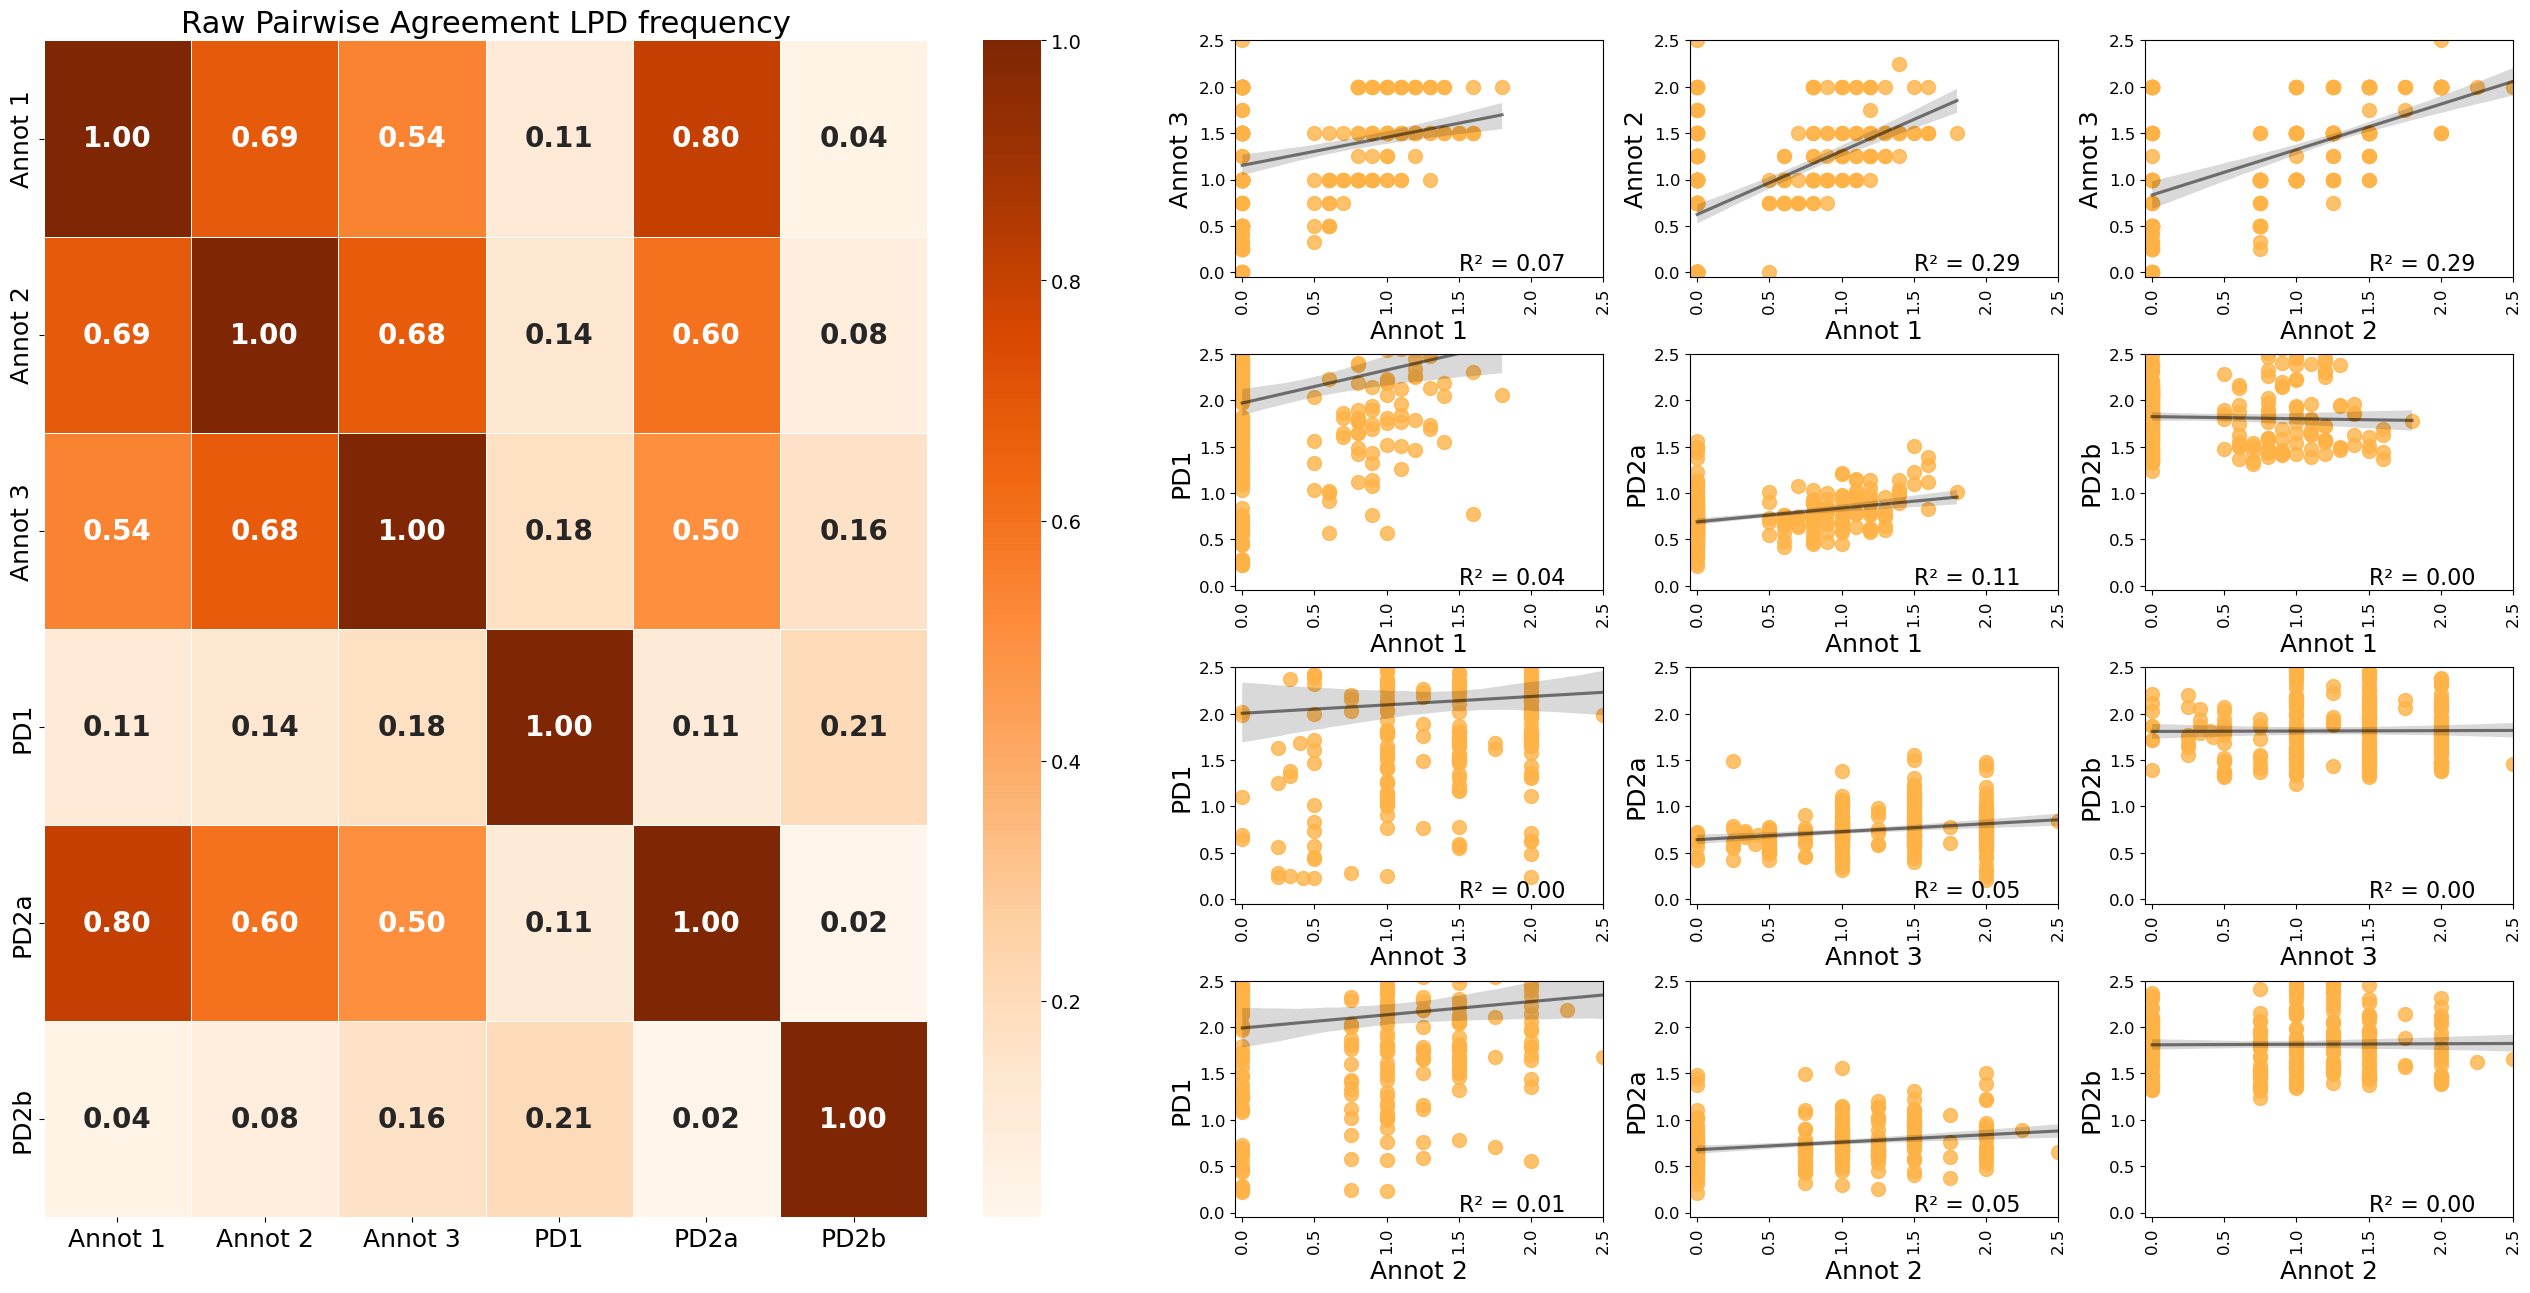

****************************************************************************************************
Pairwise agreement for:  GPD   frequency
Mean Inter-rater agreement:  0.8013698630136986  CI: 0.0   0.0
Mean Inter-rater agreement detector:  0.10616438356164383  CI: 0.0   0.0
Mean Inter-rater agreement apd:  0.7808219178082192  CI: 0.0   0.0
Mean Inter-rater agreement zscore:  0.0091324200913242  CI: 0.0   0.0


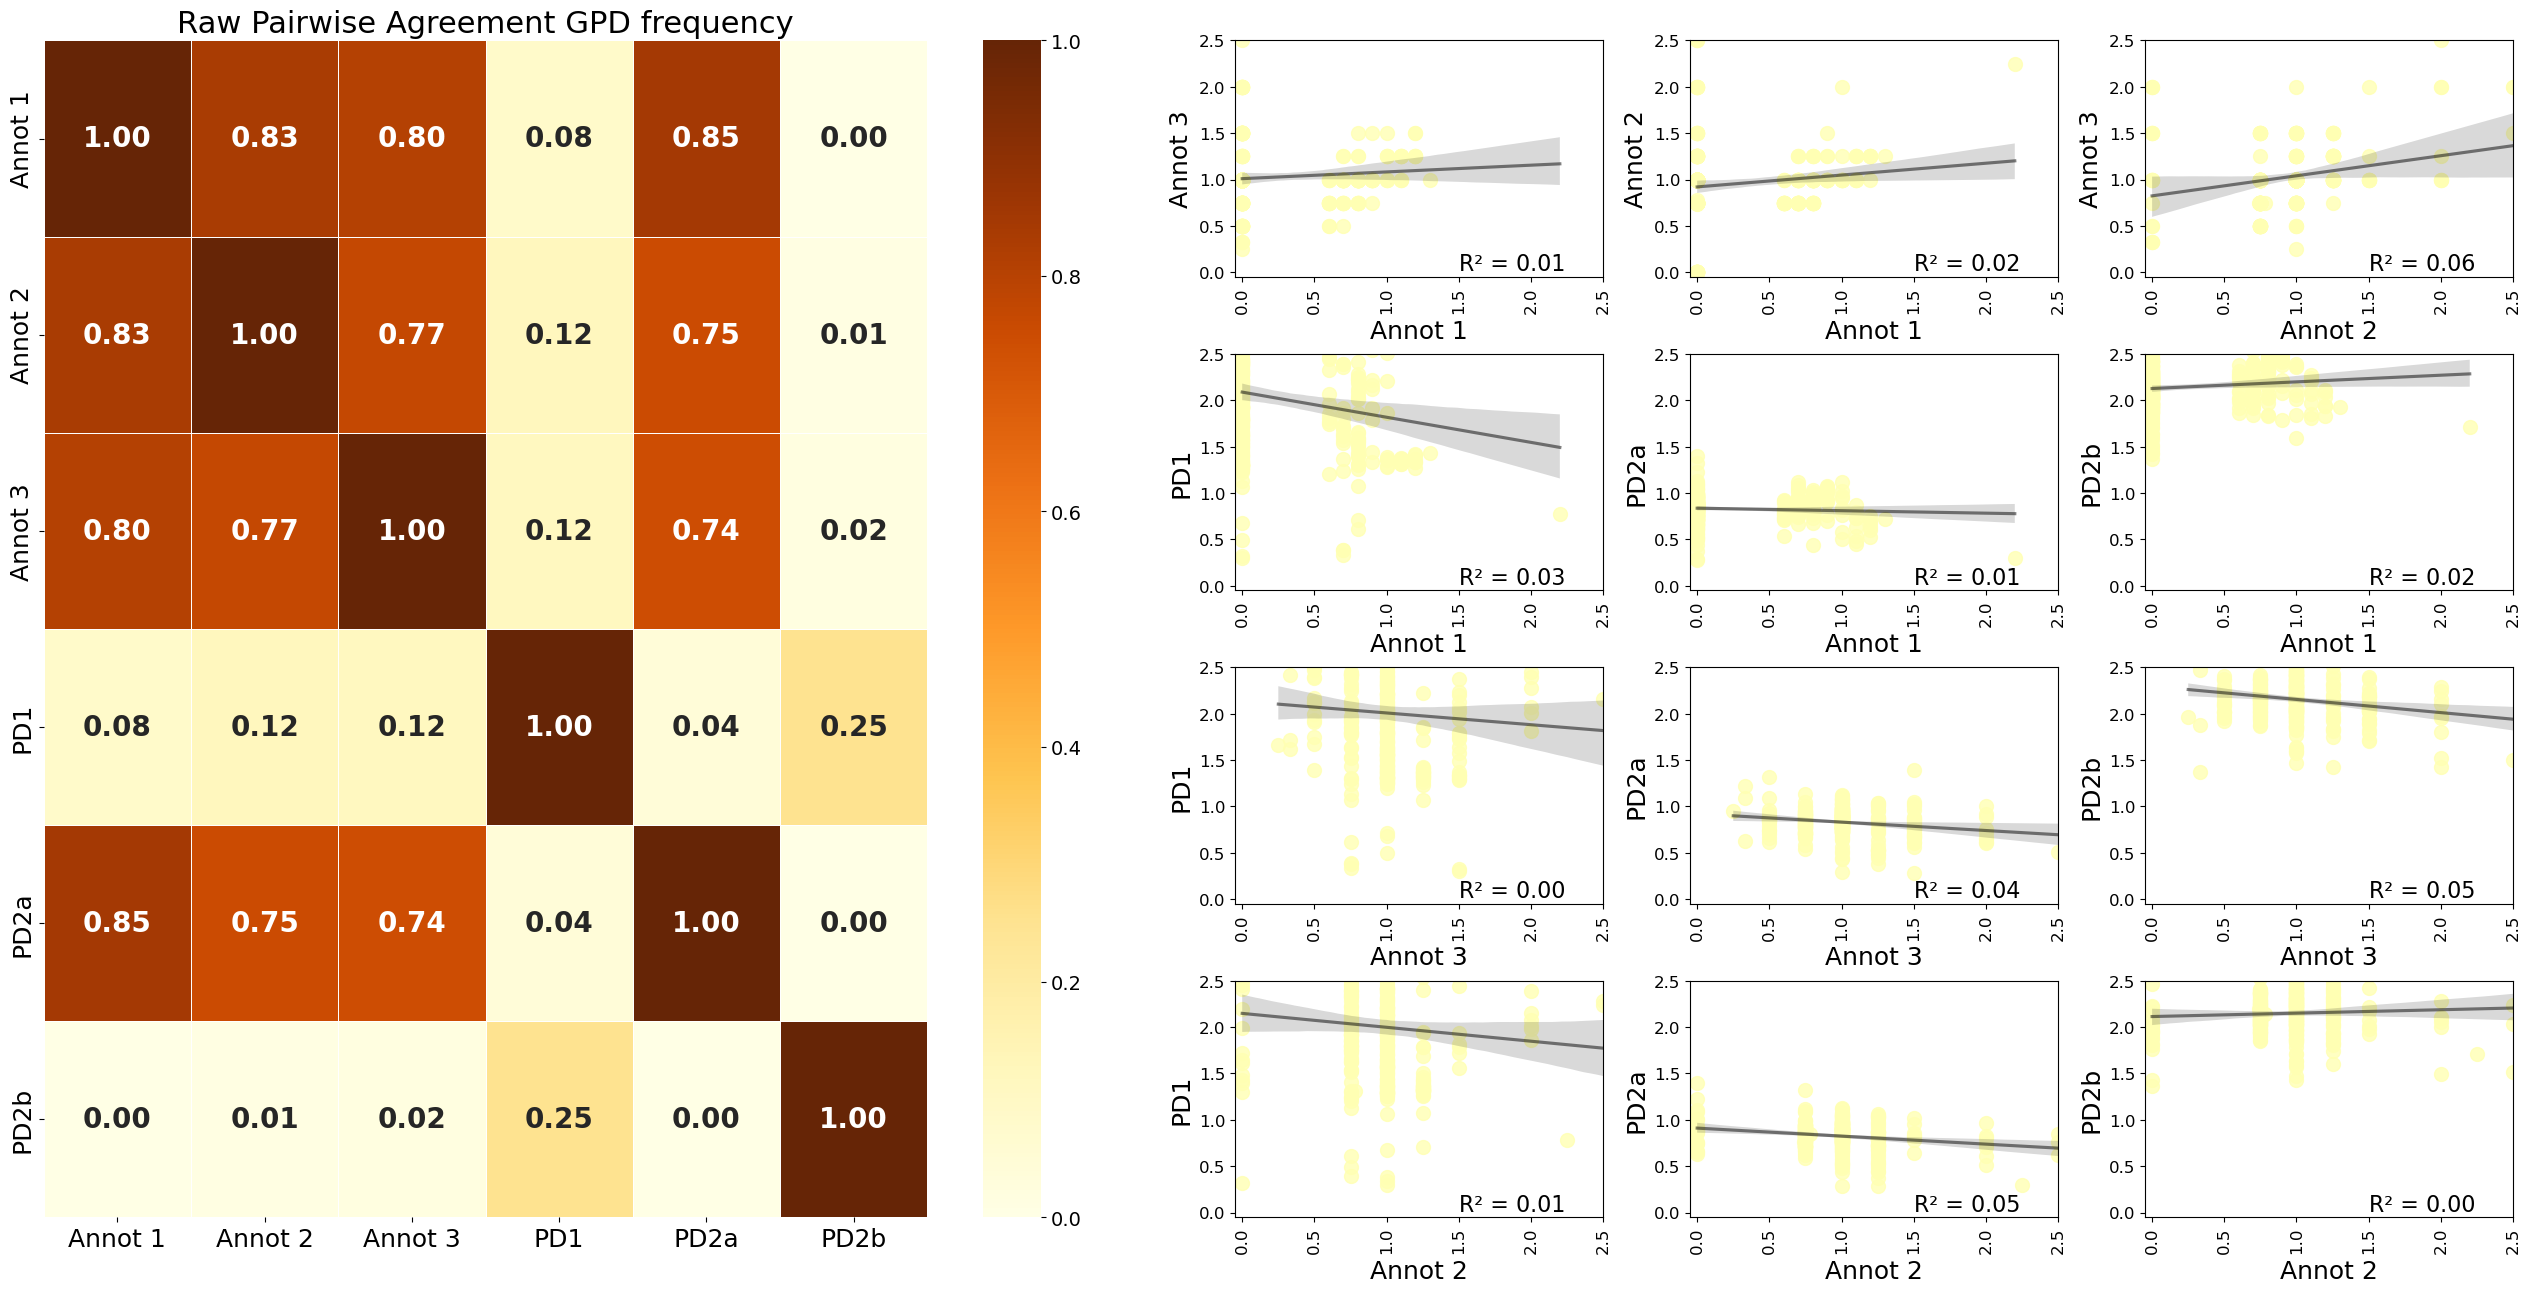

In [13]:
from matplotlib.gridspec import GridSpec
from scipy.stats import linregress
from itertools import product



def pairwise_agreement(rater1, rater2):
    return (rater1 == rater2).mean()

def ci_pairwise_agreement(rater1, rater2):
    agreements = (rater1 == rater2).sum()
    total = len(rater1)
    confidence_level = 0.95
    alpha = 1-confidence_level
    ci_wilson = smp.proportion_confint(
    count=agreements,
    nobs=total,
    alpha=alpha,
    method='wilson'
    )
    
    return ci_wilson

df_annot_gpd_spatial = pd.DataFrame(annot_gpd_spatial)
df_annot_gpd_freq = pd.DataFrame(annot_gpd_freq)
df_annot_lpd_spatial = pd.DataFrame(annot_lpd_spatial)
df_annot_lpd_freq = pd.DataFrame(annot_lpd_freq)

#df_annot_gpd_freq = df_annot_gpd_freq[(df_annot_gpd_freq['Annot 1']!=0) & (df_annot_gpd_freq['Annot 2']!=0) & (df_annot_gpd_freq['Annot 3']!=0)]
#df_annot_lpd_freq = df_annot_lpd_freq[(df_annot_lpd_freq['Annot 1']!=0) & (df_annot_lpd_freq['Annot 2']!=0) & (df_annot_lpd_freq['Annot 3']!=0)]
#df_annot_gpd_spatial = df_annot_gpd_spatial[(df_annot_gpd_spatial['Annot 1']!=0) & (df_annot_gpd_spatial['Annot 2']!=0) & (df_annot_gpd_spatial['Annot 3']!=0)]
#df_annot_lpd_spatial = df_annot_lpd_spatial[(df_annot_lpd_spatial['Annot 1']!=0) & (df_annot_lpd_spatial['Annot 2']!=0) & (df_annot_lpd_spatial['Annot 3']!=0)]

df_annot_gpd_freq = df_annot_gpd_freq.dropna()
df_annot_lpd_freq = df_annot_lpd_freq.dropna()
df_annot_gpd_spatial = df_annot_gpd_spatial.dropna()
df_annot_lpd_spatial = df_annot_lpd_spatial.dropna()

df_lpd_spatial_cat = df_lpd_spatial_cat.dropna()
df_gpd_spatial_cat = df_gpd_spatial_cat.dropna()
df_lpd_freq_cat = df_lpd_freq_cat.dropna()
df_gpd_freq_cat = df_gpd_freq_cat.dropna()

df_list1 = [df_lpd_spatial_cat,df_gpd_spatial_cat,df_lpd_freq_cat,df_gpd_freq_cat]
df_list2 = [df_annot_lpd_spatial,df_annot_gpd_spatial,df_annot_lpd_freq,df_annot_gpd_freq]
event = ['LPD','GPD','LPD','GPD']
fs = ['spatial extent','spatial extent','frequency','frequency']

idx=0
for df1,df2 in zip(df_list1, df_list2):
    print('*'*100)
    print('Pairwise agreement for: ',event[idx],' ',fs[idx])
    raters = [col for col in df1.columns]

    # Initialize the pairwise agreement matrix
    # Initialize the pairwise agreement matrix
    agreement_matrix = pd.DataFrame(np.zeros((len(raters), len(raters))), index=raters, columns=raters)
    agreement_matrix_ci_lower = pd.DataFrame(np.zeros((len(raters), len(raters))), index=raters, columns=raters)
    agreement_matrix_ci_upper = pd.DataFrame(np.zeros((len(raters), len(raters))), index=raters, columns=raters)

    # Calculate pairwise agreement (e.g., Cohen's Kappa)
    for r1, r2 in list(product(raters, repeat=2)): #combinations(raters, 2):
        kappa = pairwise_agreement(df1[r1], df1[r2])
        
        # Fill the matrix (symmetric agreement matrix)
        agreement_matrix.loc[r1, r2] = kappa
        agreement_matrix.loc[r2, r1] = kappa



    mra = np.mean([agreement_matrix.loc['Annot 1', 'Annot 2'],agreement_matrix.loc['Annot 1', 'Annot 3'],agreement_matrix.loc['Annot 3', 'Annot 2']])
    mra_ci_lower = np.mean([agreement_matrix_ci_lower.loc['Annot 1', 'Annot 2'],agreement_matrix_ci_lower.loc['Annot 1', 'Annot 3'],agreement_matrix_ci_lower.loc['Annot 3', 'Annot 2']])
    mra_ci_upper = np.mean([agreement_matrix_ci_upper.loc['Annot 1', 'Annot 2'],agreement_matrix_ci_upper.loc['Annot 1', 'Annot 3'],agreement_matrix_ci_upper.loc['Annot 3', 'Annot 2']])
    print('Mean Inter-rater agreement: ',mra,' CI:',mra_ci_lower,' ',mra_ci_upper)
    mra_detector = np.mean([agreement_matrix.loc['Annot 1', 'PD1'],agreement_matrix.loc['PD1', 'Annot 3'],agreement_matrix.loc['PD1', 'Annot 2']])
    mra_detector_ci_lower = np.mean([agreement_matrix_ci_lower.loc['Annot 1', 'PD1'],agreement_matrix_ci_lower.loc['PD1', 'Annot 3'],agreement_matrix_ci_lower.loc['PD1', 'Annot 2']])
    mra_detector_ci_upper = np.mean([agreement_matrix_ci_upper.loc['Annot 1', 'PD1'],agreement_matrix_ci_upper.loc['PD1', 'Annot 3'],agreement_matrix_ci_upper.loc['PD1', 'Annot 2']])


    mra_apd = np.mean([agreement_matrix.loc['Annot 1', 'PD2a'],agreement_matrix.loc['PD2a', 'Annot 3'],agreement_matrix.loc['PD2a', 'Annot 2']])
    mra_apd_ci_lower = np.mean([agreement_matrix_ci_lower.loc['Annot 1', 'PD2a'],agreement_matrix_ci_lower.loc['PD2a', 'Annot 3'],agreement_matrix_ci_lower.loc['PD2a', 'Annot 2']])
    mra_apd_ci_upper = np.mean([agreement_matrix_ci_upper.loc['Annot 1', 'PD2a'],agreement_matrix_ci_upper.loc['PD2a', 'Annot 3'],agreement_matrix_ci_upper.loc['PD2a', 'Annot 2']])

    mra_zscore = np.mean([agreement_matrix.loc['Annot 1', 'PD2b'],agreement_matrix.loc['PD2b', 'Annot 3'],agreement_matrix.loc['PD2b', 'Annot 2']])
    mra_zscore_ci_lower = np.mean([agreement_matrix_ci_lower.loc['Annot 1', 'PD2b'],agreement_matrix_ci_lower.loc['PD2b', 'Annot 3'],agreement_matrix_ci_lower.loc['PD2b', 'Annot 2']])
    mra_zscore_ci_upper = np.mean([agreement_matrix_ci_upper.loc['Annot 1', 'PD2b'],agreement_matrix_ci_upper.loc['PD2b', 'Annot 3'],agreement_matrix_ci_upper.loc['PD2b', 'Annot 2']])

    print('Mean Inter-rater agreement detector: ',mra_detector,' CI:',mra_detector_ci_lower,' ',mra_detector_ci_upper)
    print('Mean Inter-rater agreement apd: ',mra_apd,' CI:',mra_apd_ci_lower,' ',mra_apd_ci_upper)
    print('Mean Inter-rater agreement zscore: ',mra_zscore,' CI:',mra_zscore_ci_lower,' ',mra_zscore_ci_upper)

    mask = np.triu(np.ones_like(agreement_matrix, dtype=bool), k=0)

    fig = plt.figure(figsize=(30, 13))
    gs = GridSpec(4, 5, figure=fig, height_ratios=[0.25, 0.25, 0.25, 0.25], width_ratios=[3, 1, 1, 1, 1])

    if event[idx]=='LPD':
        color_map = 'Oranges'
        c_scatter = '#ffb347'
    elif event[idx]=='GPD':
        color_map = 'YlOrBr'
        c_scatter = '#ffffb3'

    # Large pairwise agreement matrix plot (left side)
    ax0 = fig.add_subplot(gs[:, 0])  # The first column across all rows
    #sns.heatmap(agreement_matrix, annot=True, cmap=color_map, cbar=True, fmt=".2f", linewidths=0.5, ax=ax0, mask=mask,annot_kws={"size": 20, "weight": "bold"})
    sns.heatmap(agreement_matrix, annot=True, cmap=color_map, cbar=True, fmt=".2f", linewidths=0.5, ax=ax0, annot_kws={"size": 20, "weight": "bold"})
    ax0.set_title("Raw Pairwise Agreement "+str(event[idx])+' '+str(fs[idx]),fontsize=22)
    ax0.tick_params(axis='both', which='major', labelsize=18)

    specific_combs = [('Annot 1', 'Annot 3'), ('Annot 1', 'Annot 2'),('Annot 2', 'Annot 3'),
                    ('Annot 1', 'PD1'), ('Annot 1', 'PD2a'),('Annot 1', 'PD2b'),
                    ('Annot 3', 'PD1'), ('Annot 3', 'PD2a'),('Annot 3', 'PD2b'),
                    ('Annot 2', 'PD1'), ('Annot 2', 'PD2a'),('Annot 2', 'PD2b')]
    idx_row = 0
    idx_col = 1
    for (r1, r2) in specific_combs:
        ax = fig.add_subplot(gs[idx_row, idx_col])  # Place small plots on the right side
        #plt.scatter(df2[r1], df2[r2],c=c_scatter)
        if fs[idx] == 'spatial extent':
            b = 4
        if fs[idx] == 'frequency':
            b= 6
        
       
        df_clean = df2[[r1, r2]].replace([np.inf, -np.inf], np.nan).dropna().astype(float)
        sns.regplot(x=r1, y=r2, data=df_clean, line_kws={'color':'k','alpha':0.5},color=c_scatter,scatter_kws={"s": 100})

        if fs[idx] == 'spatial extent':
            x1 = -0.05
            x2 = 1.05
            y1 = -0.05
            y2 = 1.05
            dx = 0.4
            ticks = [0.0,0.2,0.4,0.6,0.8,1.0]
        if fs[idx] == 'frequency':
            x1 = -0.05
            x2 = 2.5
            y1 = -0.05
            y2 = 2.5
            dx = 1
            ticks = [0.0,0.5,1.0,1.5,2.0,2.5]

        try:
            df_clean = df2[[r1, r2]].replace([np.inf, -np.inf], np.nan).dropna().astype(float)
            x = df_clean[r1]
            y = df_clean[r2]
            slope, intercept, r_value, p_value, std_err = linregress(x, y)
            reg_line = slope * x + intercept
            #plt.plot(x, reg_line, color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')
            equation = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}"
            txt = "R² = {r_value**2:.2f}"
            plt.text(x2-dx, y1+0.07, f"R² = {r_value**2:.2f}", fontsize=16, color='k')
        except Exception as e:
            continue

        #sns.histplot(df1[r1],discrete=True,kde=False,bins=b,label=f"{r1}")
        #sns.histplot(df1[r2],discrete=True,kde=False,bins=b,label=f"{r2}")

        ax.tick_params(axis='both', labelsize=12)
        ax.tick_params(axis='x',rotation = 90)
        
        ax.set_xlim([x1, x2])
        ax.set_ylim([y1, y2])

        ax.set_xlabel(r1,fontsize=18)
        #ax.set_xticks(ticks=ticks,labels=ticks,fontsize=12)
        ax.set_ylabel(r2,fontsize=18)
        #ax.set_yticks(ticks=ticks,labels=ticks,fontsize=12)
        #ax.legend(fontsize=6)
        idx_col +=1
        if idx_col==4: 
            idx_col=1 
            idx_row+=1    
    plt.tight_layout()
    plt.show()
    

    
    idx+=1


Mean absolute error

In [14]:
from scipy import stats

def mse(x,y):    
    squared_errors = (x-y) **2
    mse_value = np.mean(squared_errors)

    std_dev = np.std(squared_errors,ddof=1)
    se = std_dev/np.sqrt(len(squared_errors)) #standard error

    df = len(squared_errors)-1
    t_crit = 1.98

    ci_lower = mse_value - t_crit*se
    ci_upper = mse_value + t_crit*se


    return mse_value, ci_lower, ci_upper

def mae(x,y):
    
    abs_errors = np.abs(x-y)
    mae_value = np.mean(abs_errors)

    std_dev = np.std(abs_errors,ddof=1)
    se = std_dev/np.sqrt(len(abs_errors)) #standard error

    df = len(abs_errors)-1
    t_crit = 1.98

    ci_lower = mae_value - t_crit*se
    ci_upper = mae_value + t_crit*se


    return mae_value, ci_lower, ci_upper

df_annot_gpd_spatial = pd.DataFrame(annot_gpd_spatial)
df_annot_gpd_freq = pd.DataFrame(annot_gpd_freq)
df_annot_lpd_spatial = pd.DataFrame(annot_lpd_spatial)
df_annot_lpd_freq = pd.DataFrame(annot_lpd_freq)

df_annot_gpd_freq = df_annot_gpd_freq[(df_annot_gpd_freq['Annot 1']!=0) & (df_annot_gpd_freq['Annot 2']!=0) & (df_annot_gpd_freq['Annot 3']!=0)]
df_annot_lpd_freq = df_annot_lpd_freq[(df_annot_lpd_freq['Annot 1']!=0) & (df_annot_lpd_freq['Annot 2']!=0) & (df_annot_lpd_freq['Annot 3']!=0)]
df_annot_gpd_spatial = df_annot_gpd_spatial[(df_annot_gpd_spatial['Annot 1']!=0) & (df_annot_gpd_spatial['Annot 2']!=0) & (df_annot_gpd_spatial['Annot 3']!=0)]
df_annot_lpd_spatial = df_annot_lpd_spatial[(df_annot_lpd_spatial['Annot 1']!=0) & (df_annot_lpd_spatial['Annot 2']!=0) & (df_annot_lpd_spatial['Annot 3']!=0)]

df_list = [df_annot_lpd_spatial,df_annot_gpd_spatial,df_annot_lpd_freq,df_annot_gpd_freq]
event = ['LPD','GPD','LPD','GPD']
fs = ['spatial','spatial','freq','freq']
algo_raters = ['PD1','PD2a','PD2b']

idx = 0
for df in df_list:
    print('*'*100)
    print('MAE analysis for:',event[idx],fs[idx])
    df['mean_rating'] = np.mean(df[['Annot 1','Annot 3','Annot 2']])
    for algo_rater in algo_raters:
        mae_value, ci_lower, ci_upper = mae(df['mean_rating'],df[algo_rater])
        print('MAE of mean rater values and',algo_rater,': ',mae_value,' with the CI 95: ',ci_lower,' ',ci_upper)
        mae_value, ci_lower, ci_upper = mae(df['Annot 1'],df[algo_rater])
        print('MAE of SZ and',algo_rater,': ',mae_value,' with the CI 95: ',ci_lower,' ',ci_upper)
        mae_value, ci_lower, ci_upper = mae(df['Annot 3'],df[algo_rater])
        print('MAE of PH and',algo_rater,': ',mae_value,' with the CI 95: ',ci_lower,' ',ci_upper)
        mae_value, ci_lower, ci_upper = mae(df['Annot 2'],df[algo_rater])
        print('MAE of LB and',algo_rater,': ',mae_value,' with the CI 95: ',ci_lower,' ',ci_upper)
    idx +=1

****************************************************************************************************
MAE analysis for: LPD spatial
MAE of mean rater values and PD1 :  nan  with the CI 95:  nan   nan
MAE of SZ and PD1 :  0.6496565656565657  with the CI 95:  0.6051278820421236   0.6941852492710078
MAE of PH and PD1 :  0.3722121212121212  with the CI 95:  0.32353664682891375   0.4208875955953287
MAE of LB and PD1 :  0.6131111111111112  with the CI 95:  0.5724858155687529   0.6537364066534694
MAE of mean rater values and PD2a :  nan  with the CI 95:  nan   nan
MAE of SZ and PD2a :  0.14271717171717177  with the CI 95:  0.11848091346156264   0.1669534299727809
MAE of PH and PD2a :  0.3391616161616162  with the CI 95:  0.296148071140381   0.38217516118285144
MAE of LB and PD2a :  0.13319191919191922  with the CI 95:  0.11158908011722166   0.1547947582666168
MAE of mean rater values and PD2b :  nan  with the CI 95:  nan   nan
MAE of SZ and PD2b :  0.7133933933933934  with the CI 95:  0.679499

/Users/alexandratautan/miniforge3/envs/foe/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/alexandratautan/miniforge3/envs/foe/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/alexandratautan/miniforge3/envs/foe/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  re

LRDA & GRDA

ICC

In [15]:
df_annot_grda_spatial = pd.DataFrame(annot_grda_spatial)
df_annot_grda_freq = pd.DataFrame(annot_grda_freq)
df_annot_lrda_spatial = pd.DataFrame(annot_lrda_spatial)
df_annot_lrda_freq = pd.DataFrame(annot_lrda_freq)

#df_annot_grda_freq = df_annot_grda_freq[(df_annot_grda_freq['Annot 1']!=0) & (df_annot_grda_freq['Annot 2']!=0) & (df_annot_grda_freq['Annot 3']!=0)]
df_annot_grda_freq = pd.melt(df_annot_grda_freq,var_name='rater',value_name='annotation')
df_annot_grda_freq['segment'] = df_annot_grda_freq.groupby('rater').cumcount()+1
df_annot_grda_freq['type'] = ['freq']*len(df_annot_grda_freq)

#df_annot_lrda_freq = df_annot_lrda_freq[(df_annot_lrda_freq['Annot 1']!=0) & (df_annot_lrda_freq['Annot 2']!=0) & (df_annot_lrda_freq['Annot 3']!=0)]
df_annot_lrda_freq = pd.melt(df_annot_lrda_freq,var_name='rater',value_name='annotation')
df_annot_lrda_freq['segment'] = df_annot_lrda_freq.groupby('rater').cumcount()+1
df_annot_lrda_freq['type'] = ['freq']*len(df_annot_lrda_freq)

#df_annot_grda_spatial = df_annot_grda_spatial[(df_annot_grda_spatial['Annot 1']!=0) & (df_annot_grda_spatial['Annot 2']!=0) & (df_annot_grda_spatial['Annot 3']!=0)]
df_annot_grda_spatial = pd.melt(df_annot_grda_spatial,var_name='rater',value_name='annotation')
df_annot_grda_spatial['segment'] = df_annot_grda_spatial.groupby('rater').cumcount()+1
df_annot_grda_spatial['type'] = ['spatial']*len(df_annot_grda_spatial)

#df_annot_lrda_spatial = df_annot_lrda_spatial[(df_annot_lrda_spatial['Annot 1']!=0) & (df_annot_lrda_spatial['Annot 2']!=0) & (df_annot_lrda_spatial['Annot 3']!=0)]
df_annot_lrda_spatial = pd.melt(df_annot_lrda_spatial,var_name='rater',value_name='annotation')
df_annot_lrda_spatial['segment'] = df_annot_lrda_spatial.groupby('rater').cumcount()+1
df_annot_lrda_spatial['type'] = ['spatial']*len(df_annot_lrda_spatial)

#ICC
icc3_rda_event_freq = []
icc3_rda_type_freq = []
icc3_rda_event_spatial = []
icc3_rda_type_spatial = []
icc3_rda_freq = []
icc3k_rda_freq = []
icc3_rda_spatial = []
icc3k_rda_spatial = []
icc3_ci_rda_freq = []
icc3k_ci_rda_freq = []
icc3_ci_rda_spatial = []
icc3k_ci_rda_spatial = []

df_list = [df_annot_lrda_freq,df_annot_grda_freq, df_annot_lrda_spatial, df_annot_grda_spatial ]
event = ['LRDA','GRDA','LRDA','GRDA']
fs = ['freq','freq','spatial','spatial']
algo_raters = ['RDA1a-FFT','RDA1b-FFT','RDA2-HHT']

idx=0
for df in df_list:
    
    df_annot_icc_annotators = df.drop(columns=['type'])
    df_icc = df_annot_icc_annotators[df_annot_icc_annotators['rater'].isin(['Annot 1','Annot 2','Annot 3'])]

    icc = pg.intraclass_corr(data=df_icc, targets='segment', raters='rater', ratings='annotation',nan_policy='omit')
    

    if fs[idx]=='spatial':
        icc3_rda_spatial.append(icc.loc[icc['Type']=='ICC3','ICC'].values[0])
        icc3k_rda_spatial.append(icc.loc[icc['Type']=='ICC3k','ICC'].values[0])
        icc3_ci_rda_spatial.append(icc.loc[icc['Type']=='ICC3','CI95%'].values[0])
        icc3k_ci_rda_spatial.append(icc.loc[icc['Type']=='ICC3k','CI95%'].values[0])
        icc3_rda_type_spatial.append('annotators')
        icc3_rda_event_spatial.append(event[idx])

    if fs[idx]=='freq':
        icc3_rda_freq.append(icc.loc[icc['Type']=='ICC3','ICC'].values[0])
        icc3k_rda_freq.append(icc.loc[icc['Type']=='ICC3k','ICC'].values[0])
        icc3_ci_rda_freq.append(icc.loc[icc['Type']=='ICC3','CI95%'].values[0])
        icc3k_ci_rda_freq.append(icc.loc[icc['Type']=='ICC3k','CI95%'].values[0])
        icc3_rda_type_freq.append('annotators')
        icc3_rda_event_freq.append(event[idx])
        

    for algo_rater in algo_raters:
        df_icc_algo = df_annot_icc_annotators[df_annot_icc_annotators['rater'].isin(['Annot 1','Annot 2','Annot 3',algo_rater])]  
        
        icc = pg.intraclass_corr(data=df_icc_algo, targets='segment', raters='rater', ratings='annotation',nan_policy='omit')
        if fs[idx]=='spatial':
            icc3_rda_spatial.append(icc.loc[icc['Type']=='ICC3','ICC'].values[0])
            icc3k_rda_spatial.append(icc.loc[icc['Type']=='ICC3k','ICC'].values[0])
            icc3_ci_rda_spatial.append(icc.loc[icc['Type']=='ICC3','CI95%'].values[0])
            icc3k_ci_rda_spatial.append(icc.loc[icc['Type']=='ICC3k','CI95%'].values[0])
            icc3_rda_type_spatial.append(str('annotators'+'_'+algo_rater))
            icc3_rda_event_spatial.append(event[idx])
            
        if fs[idx]=='freq':
            icc3_rda_freq.append(icc.loc[icc['Type']=='ICC3','ICC'].values[0])
            icc3k_rda_freq.append(icc.loc[icc['Type']=='ICC3k','ICC'].values[0])
            icc3_ci_rda_freq.append(icc.loc[icc['Type']=='ICC3','CI95%'].values[0])
            icc3k_ci_rda_freq.append(icc.loc[icc['Type']=='ICC3k','CI95%'].values[0])
            icc3_rda_type_freq.append(str('annotators'+'_'+algo_rater))
            icc3_rda_event_freq.append(event[idx])
            
    idx+=1

/var/folders/93/dmr7m61x04n24v7hx7bsj8_w0000gp/T/ipykernel_63901/3415763575.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
/var/folders/93/dmr7m61x04n24v7hx7bsj8_w0000gp/T/ipykernel_63901/3415763575.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
/var/folders/93/dmr7m61x04n24v7hx7bsj8_w0000gp/T/ipykernel_63901/3415763575.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
/var/folders/93/dmr7m61x04n24v7hx7bsj8_w0000gp/T/ipykernel_63901/3415763575.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)


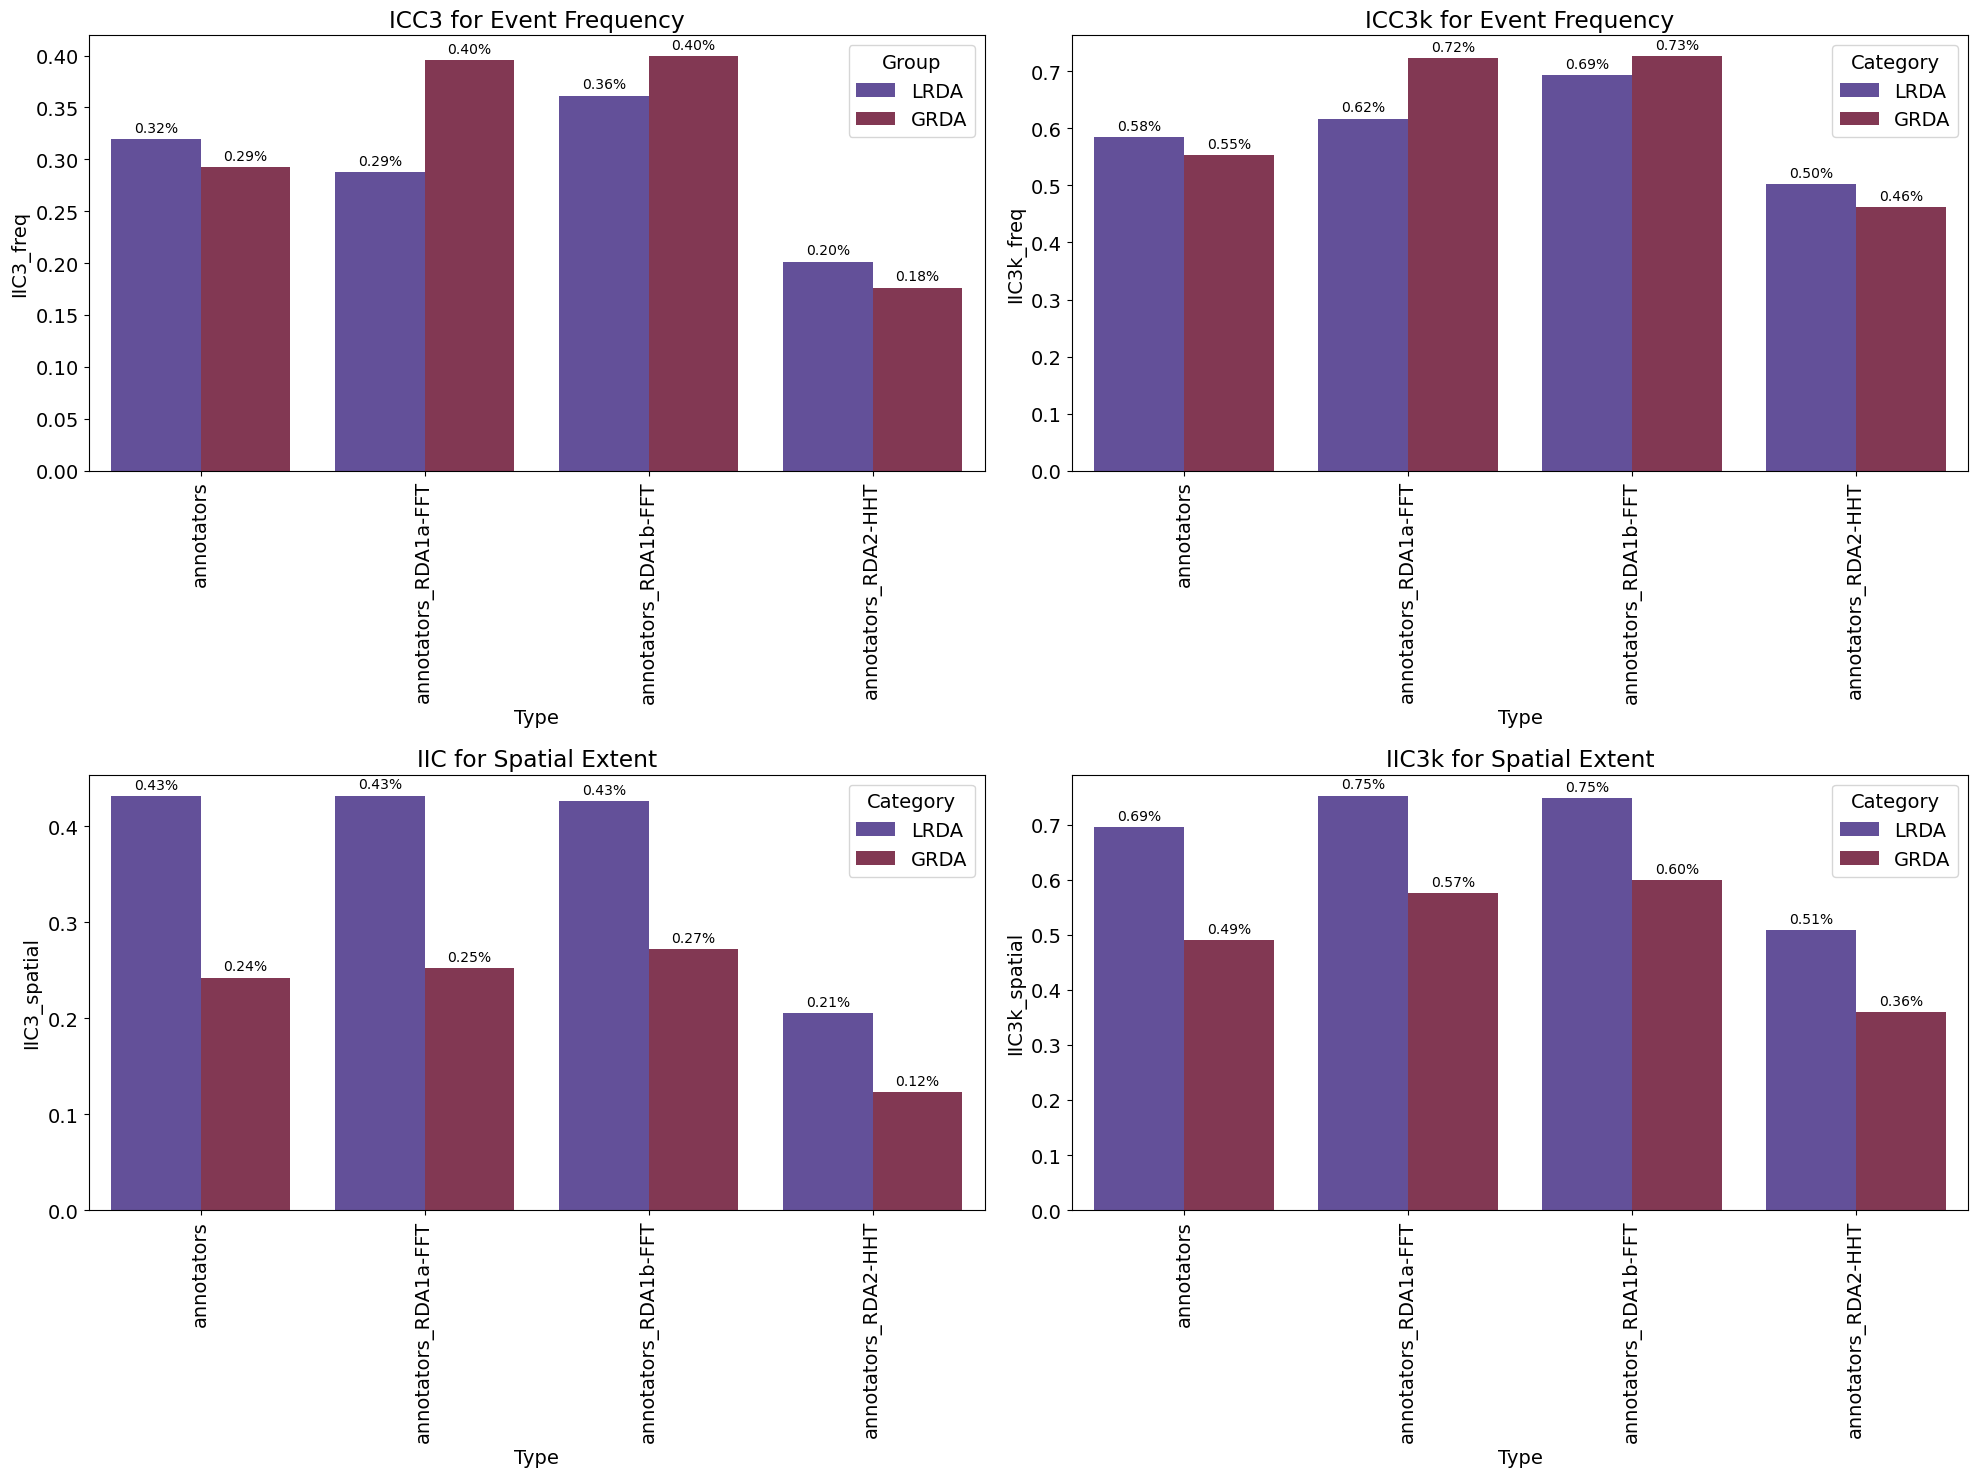

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample Data
df_plot = pd.DataFrame({
    'Type':icc3_rda_type_freq,
    'Event':icc3_rda_event_freq,
    'IIC3_freq':icc3_rda_freq,
    'IIC3k_freq':icc3k_rda_freq,
    'ICC3k_freq_ci':icc3k_ci_rda_freq,
    'IIC3_spatial':icc3_rda_spatial,
    'IIC3k_spatial':icc3k_rda_spatial,
    'IIC3k_spatial_ci':icc3k_ci_rda_spatial
})

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 15))  
plt.rcParams.update({'font.size': 14})

# First subplot
barplot = sns.barplot(x='Type', y='IIC3_freq', hue='Event', data=df_plot, ax=axes[0,0],palette="twilight")
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f%%', label_type='edge', fontsize=10, padding=3)

axes[0,0].set_title('ICC3 for Event Frequency')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
axes[0,0].legend(title='Group')



# Second subplot
barplot = sns.barplot(x='Type', y='IIC3k_freq', hue='Event', data=df_plot, ax=axes[0,1],palette="twilight")
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f%%', label_type='edge', fontsize=10, padding=3)

axes[0,1].set_title('ICC3k for Event Frequency')
axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
axes[0,1].legend(title='Category')

barplot = sns.barplot(x='Type', y='IIC3_spatial', hue='Event', data=df_plot, ax=axes[1,0],palette="twilight")
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f%%', label_type='edge', fontsize=10, padding=3)

axes[1,0].set_title('IIC for Spatial Extent')
axes[1,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
axes[1,0].legend(title='Category')

barplot = sns.barplot(x='Type', y='IIC3k_spatial', hue='Event', data=df_plot, ax=axes[1,1],palette="twilight")
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f%%', label_type='edge', fontsize=10, padding=3)

axes[1,1].set_title('IIC3k for Spatial Extent')
axes[1,1].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
axes[1,1].legend(title='Category')

plt.tight_layout()
plt.show()


Pairwise agreement

In [17]:
#Pairwise agreement
df_annot_grda_spatial = pd.DataFrame(annot_grda_spatial)
df_annot_grda_freq = pd.DataFrame(annot_grda_freq)
df_annot_lrda_spatial = pd.DataFrame(annot_lrda_spatial)
df_annot_lrda_freq = pd.DataFrame(annot_lrda_freq)

#df_annot_grda_freq = df_annot_grda_freq[(df_annot_grda_freq['Annot 1']!=0) & (df_annot_grda_freq['Annot 2']!=0) & (df_annot_grda_freq['Annot 3']!=0)]
#df_annot_lrda_freq = df_annot_lrda_freq[(df_annot_lrda_freq['Annot 1']!=0) & (df_annot_lrda_freq['Annot 2']!=0) & (df_annot_lrda_freq['Annot 3']!=0)]
#df_annot_grda_spatial = df_annot_grda_spatial[(df_annot_grda_spatial['Annot 1']!=0) & (df_annot_grda_spatial['Annot 2']!=0) & (df_annot_grda_spatial['Annot 3']!=0)]
#df_annot_lrda_spatial = df_annot_lrda_spatial[(df_annot_lrda_spatial['Annot 1']!=0) & (df_annot_lrda_spatial['Annot 2']!=0) & (df_annot_lrda_spatial['Annot 3']!=0)]

df_grda_freq_cat = df_annot_grda_freq
df_lrda_freq_cat = df_annot_lrda_freq
df_grda_spatial_cat = df_annot_grda_spatial
df_lrda_spatial_cat = df_annot_lrda_spatial

raters = ['Annot 1','Annot 3','Annot 2','RDA1a-FFT','RDA1b-FFT','RDA2-HHT']
bins = [0,1,1.5,2,2.5,3,10]
labels = ['<1Hz','1-1.5Hz','1.5-2Hz','2-2.5Hz','2.5-3Hz','>3Hz']
for rater in raters:
    df_grda_freq_cat[rater] = pd.cut(df_grda_freq_cat[rater],bins=bins,labels=labels, include_lowest=True)
    df_lrda_freq_cat[rater] = pd.cut(df_annot_lrda_freq[rater],bins=bins,labels=labels, include_lowest=True)

#bins = [0,0.05,0.11,0.16,0.22,0.27,0.33,0.38,0.44,0.5,0.55,0.61,0.66,0.72,0.77,0.83,0.88,0.94,1]
#labels = ['1/18','2/18','3/18','4/18','5/18','6/18','7/18','8/18','9/18','10/18','11/18','12/18','13/18','14/18','15/18','16/18','17/18','18/18']
bins = [0,0.25,0.50,0.75,1]
labels = ['1-4/18','5-10/18','11-14/18','15-18/18']
for rater in raters:
    df_grda_spatial_cat[rater] = pd.cut(df_grda_spatial_cat[rater],bins=bins,labels=labels, include_lowest=True)
    df_lrda_spatial_cat[rater] = pd.cut(df_lrda_spatial_cat[rater],bins=bins,labels=labels, include_lowest=True)

****************************************************************************************************
Pairwise agreement for:  LRDA   spatial extent
Mean Inter-rater agreement:  0.2238095238095238
Mean Inter-rater agreement hilbert:  0.26666666666666666
Mean Inter-rater agreement fooof:  0.20476190476190478
Mean Inter-rater agreement fooof_enhanced:  0.30000000000000004


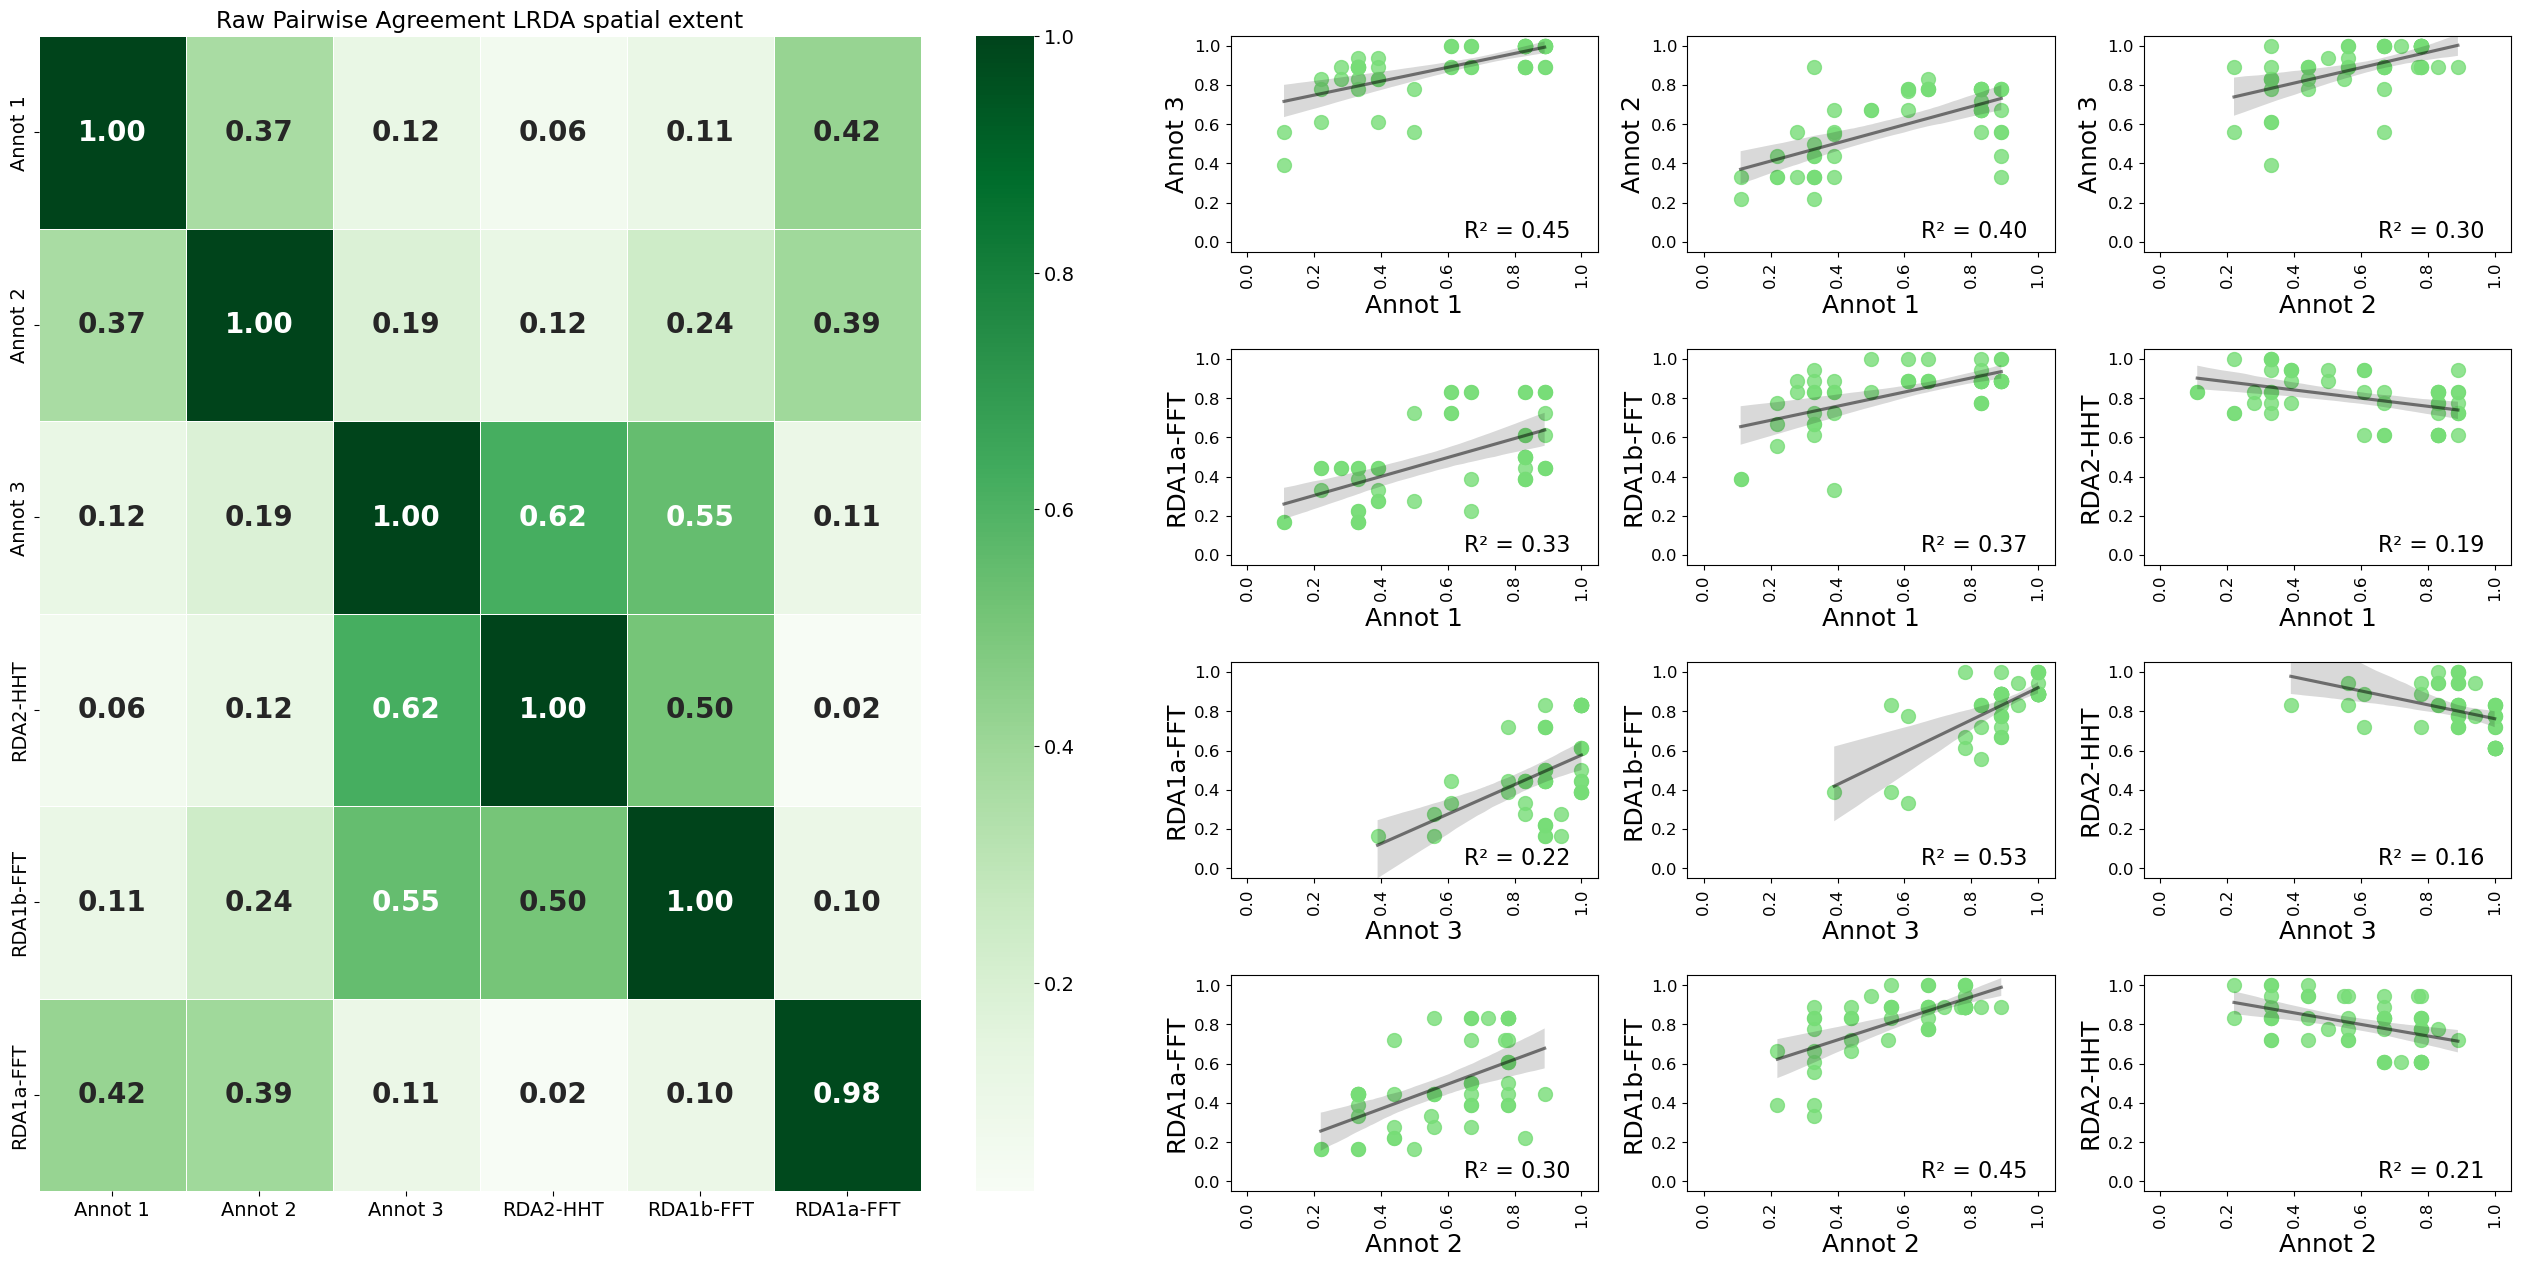

****************************************************************************************************
Pairwise agreement for:  GRDA   spatial extent
Mean Inter-rater agreement:  0.5368421052631579
Mean Inter-rater agreement hilbert:  0.6807017543859649
Mean Inter-rater agreement fooof:  0.23391812865497075
Mean Inter-rater agreement fooof_enhanced:  0.519298245614035


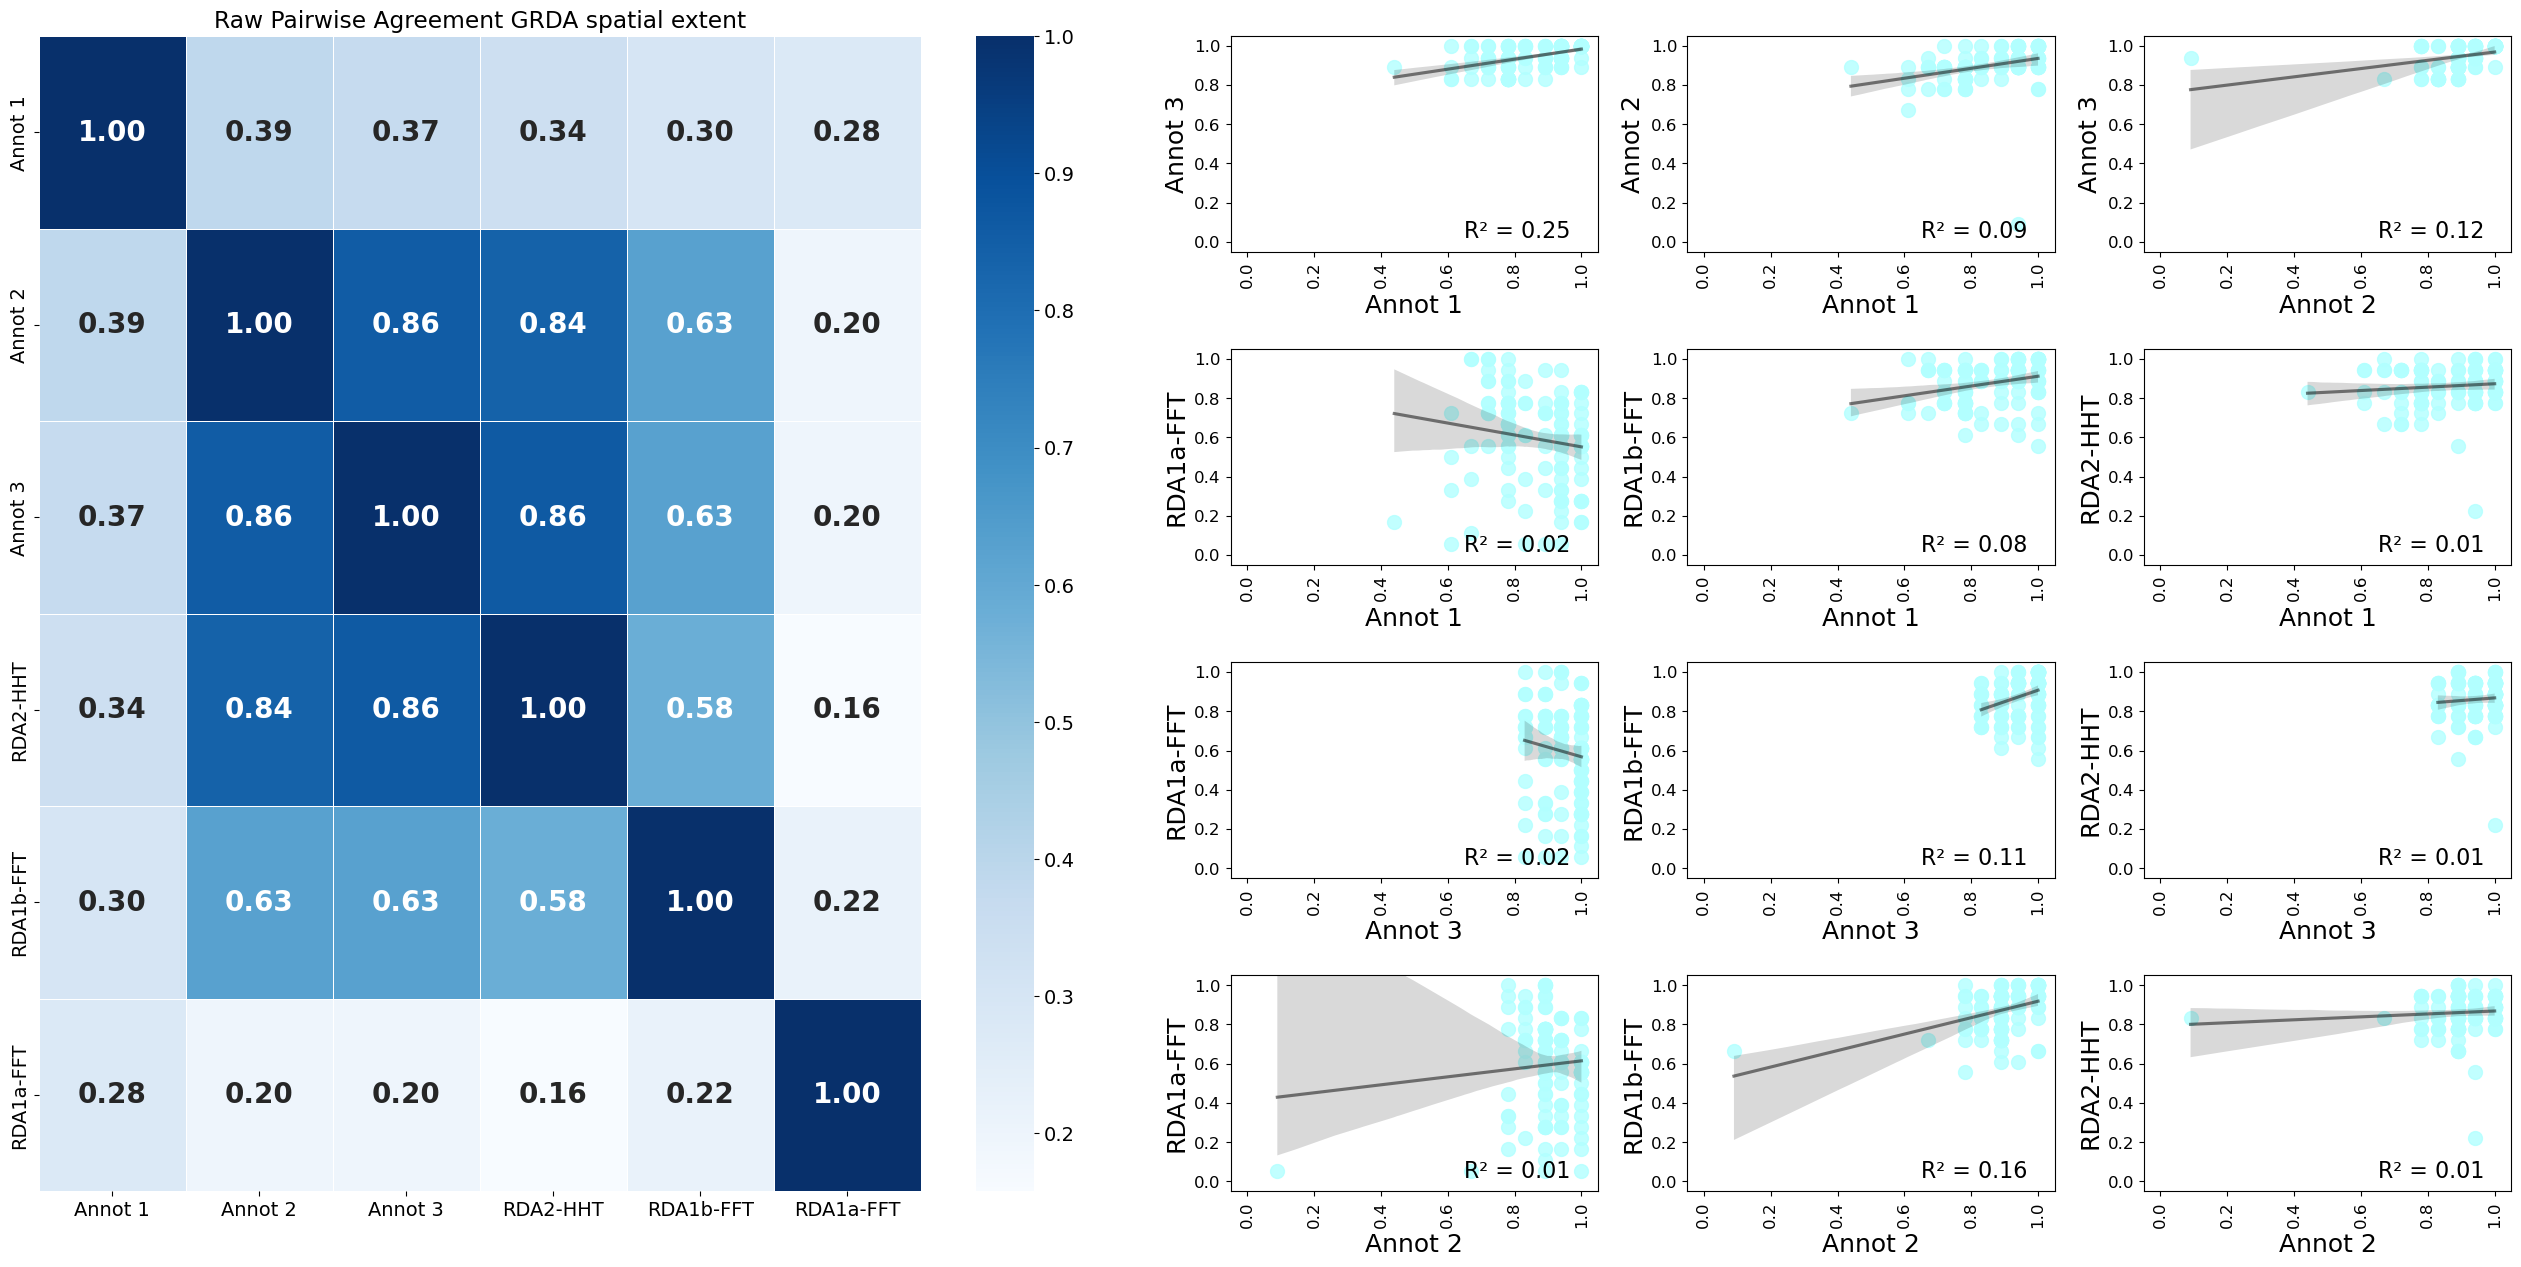

****************************************************************************************************
Pairwise agreement for:  LRDA   frequency
Mean Inter-rater agreement:  0.4301587301587302
Mean Inter-rater agreement hilbert:  0.2714285714285714
Mean Inter-rater agreement fooof:  0.4428571428571429
Mean Inter-rater agreement fooof_enhanced:  0.4333333333333333


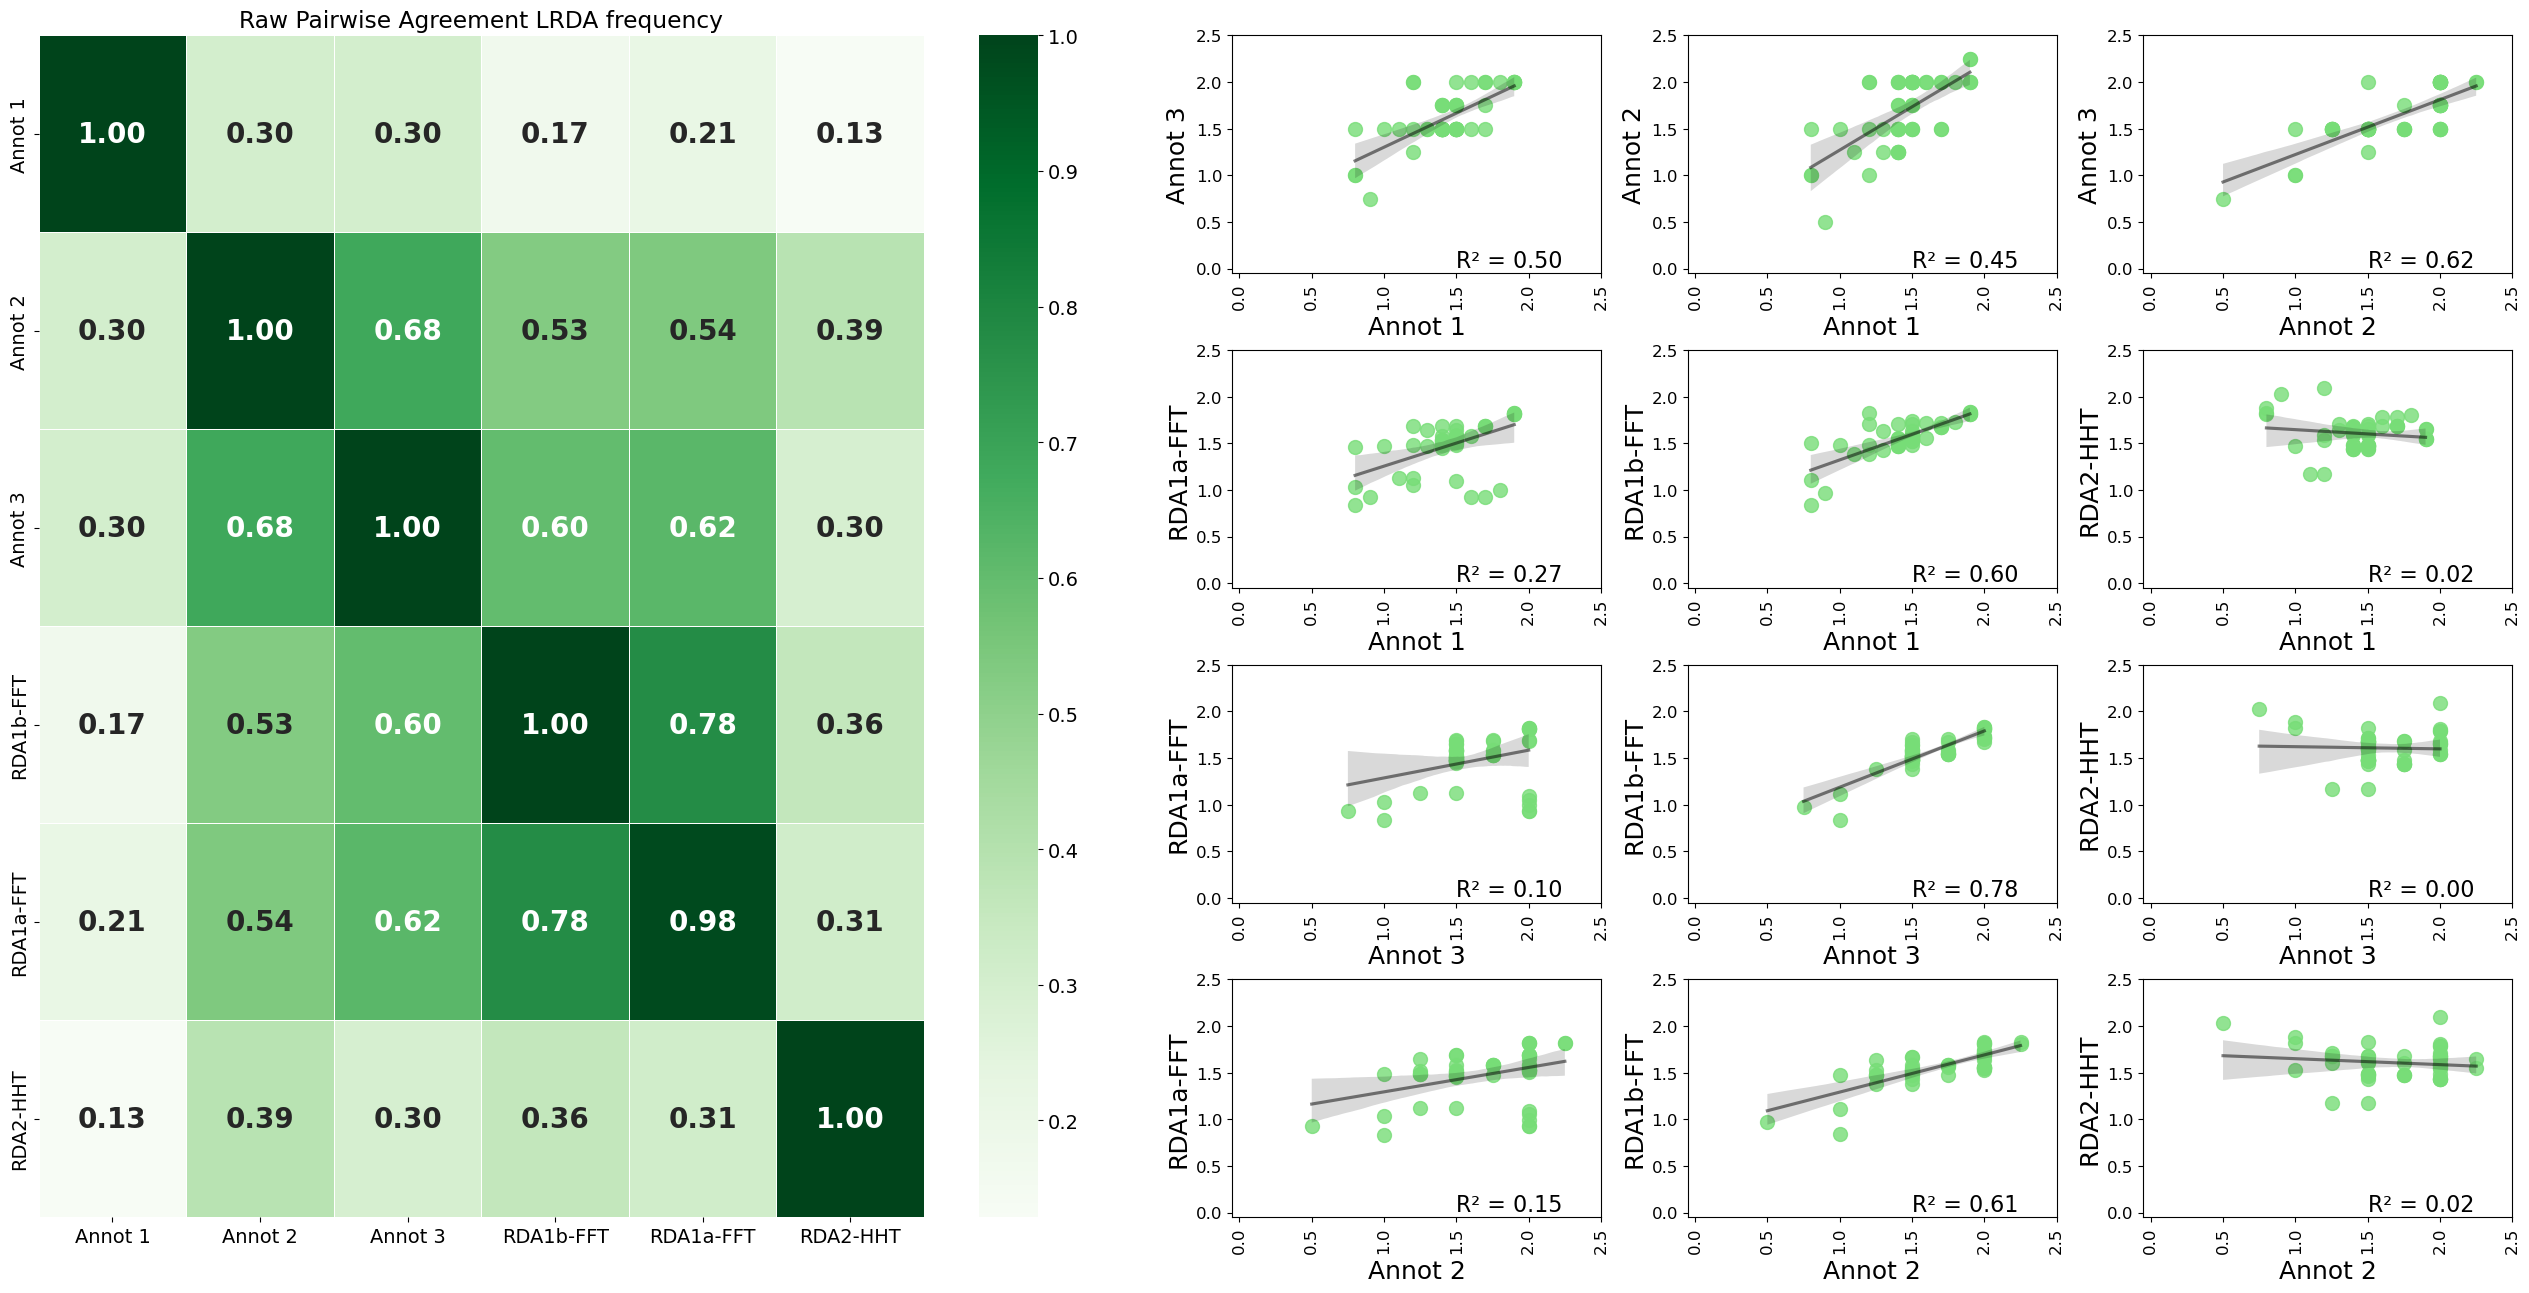

****************************************************************************************************
Pairwise agreement for:  GRDA   frequency
Mean Inter-rater agreement:  0.6584795321637427
Mean Inter-rater agreement hilbert:  0.24795321637426904
Mean Inter-rater agreement fooof:  0.672514619883041
Mean Inter-rater agreement fooof_enhanced:  0.6713450292397661


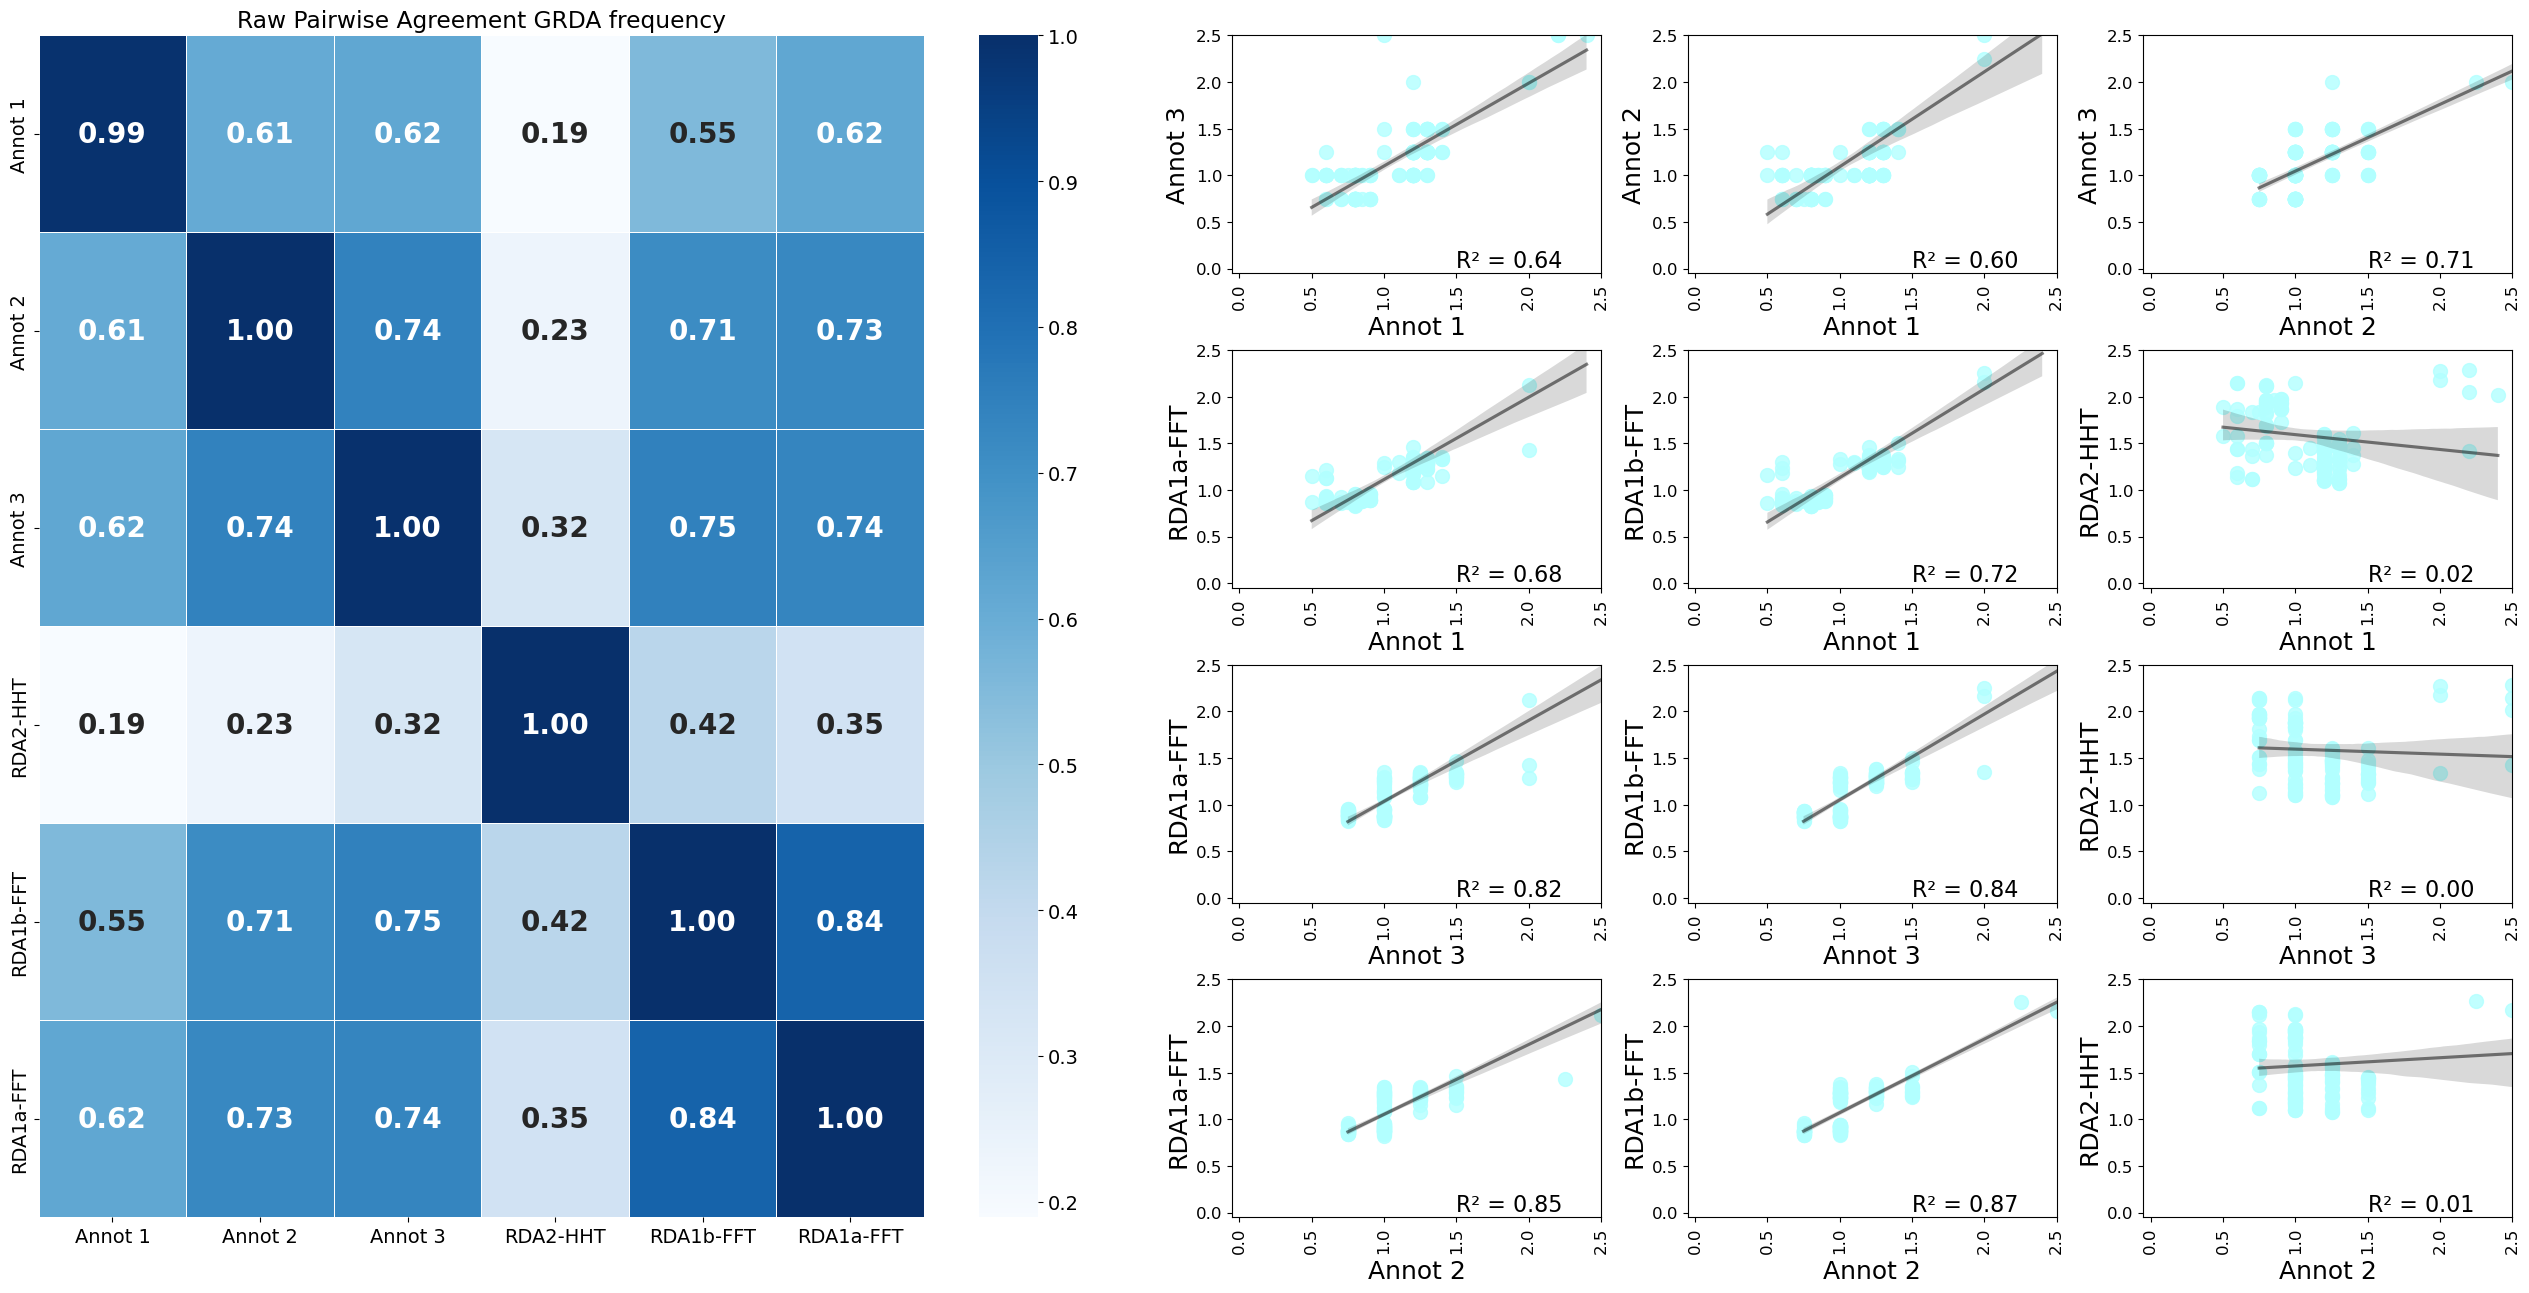

In [18]:
from matplotlib.gridspec import GridSpec
from scipy.stats import linregress


def pairwise_agreement(rater1, rater2):
    return (rater1 == rater2).mean()

df_annot_grda_spatial = pd.DataFrame(annot_grda_spatial)
df_annot_grda_freq = pd.DataFrame(annot_grda_freq)
df_annot_lrda_spatial = pd.DataFrame(annot_lrda_spatial)
df_annot_lrda_freq = pd.DataFrame(annot_lrda_freq)

df_annot_grda_freq = df_annot_grda_freq[(df_annot_grda_freq['Annot 1']!=0) & (df_annot_grda_freq['Annot 2']!=0) & (df_annot_grda_freq['Annot 3']!=0)]
df_annot_lrda_freq = df_annot_lrda_freq[(df_annot_lrda_freq['Annot 1']!=0) & (df_annot_lrda_freq['Annot 2']!=0) & (df_annot_lrda_freq['Annot 3']!=0)]
df_annot_grda_spatial = df_annot_grda_spatial[(df_annot_grda_spatial['Annot 1']!=0) & (df_annot_grda_spatial['Annot 2']!=0) & (df_annot_grda_spatial['Annot 3']!=0)]
df_annot_lrda_spatial = df_annot_lrda_spatial[(df_annot_lrda_spatial['Annot 1']!=0) & (df_annot_lrda_spatial['Annot 2']!=0) & (df_annot_lrda_spatial['Annot 3']!=0)]

df_list1 = [df_lrda_spatial_cat,df_grda_spatial_cat,df_lrda_freq_cat,df_grda_freq_cat]
df_list2 = [df_annot_lrda_spatial,df_annot_grda_spatial,df_annot_lrda_freq,df_annot_grda_freq]
event = ['LRDA','GRDA','LRDA','GRDA']
fs = ['spatial extent','spatial extent','frequency','frequency']

idx=0
for df1,df2 in zip(df_list1, df_list2):
    print('*'*100)
    print('Pairwise agreement for: ',event[idx],' ',fs[idx])
    raters = [col for col in df1.columns]

    # Initialize the pairwise agreement matrix
    agreement_matrix = pd.DataFrame(np.zeros((len(raters), len(raters))), index=raters, columns=raters)

    # Calculate pairwise agreement (e.g., Cohen's Kappa)
    for r1, r2 in list(product(raters, repeat=2)): #combinations(raters, 2):
        kappa = pairwise_agreement(df1[r1], df1[r2])
        
        # Fill the matrix (symmetric agreement matrix)
        agreement_matrix.loc[r1, r2] = kappa
        agreement_matrix.loc[r2, r1] = kappa

    mra = np.mean([agreement_matrix.loc['Annot 1', 'Annot 2'],agreement_matrix.loc['Annot 1', 'Annot 3'],agreement_matrix.loc['Annot 3', 'Annot 2']])
    print('Mean Inter-rater agreement: ',mra)
    mra_hilbert = np.mean([agreement_matrix.loc['Annot 1', 'RDA2-HHT'],agreement_matrix.loc['RDA2-HHT', 'Annot 3'],agreement_matrix.loc['RDA2-HHT', 'Annot 2']])
    mra_fooof = np.mean([agreement_matrix.loc['Annot 1', 'RDA1b-FFT'],agreement_matrix.loc['RDA1a-FFT', 'Annot 3'],agreement_matrix.loc['RDA1a-FFT', 'Annot 2']])
    mra_fooof_enhanced = np.mean([agreement_matrix.loc['Annot 1', 'RDA1b-FFT'],agreement_matrix.loc['RDA1b-FFT', 'Annot 3'],agreement_matrix.loc['RDA1b-FFT', 'Annot 2']])
    print('Mean Inter-rater agreement hilbert: ',mra_hilbert)
    print('Mean Inter-rater agreement fooof: ',mra_fooof)
    print('Mean Inter-rater agreement fooof_enhanced: ',mra_fooof_enhanced)

    mask = np.triu(np.ones_like(agreement_matrix, dtype=bool), k=0)

    fig = plt.figure(figsize=(30, 13))
    gs = GridSpec(4, 5, figure=fig, height_ratios=[0.25, 0.25, 0.25, 0.25], width_ratios=[3, 1, 1, 1, 1])

    if event[idx]=='LRDA':
        color_map = 'Greens'
        c_scatter = '#77dd77'
    elif event[idx]=='GRDA':
        color_map = 'Blues'
        c_scatter = '#b2ffff'

    # Large pairwise agreement matrix plot (left side)
    ax0 = fig.add_subplot(gs[:, 0])  # The first column across all rows
    #sns.heatmap(agreement_matrix, annot=True, cmap=color_map, cbar=True, fmt=".2f", linewidths=0.5, ax=ax0, mask=mask,annot_kws={"size": 20, "weight": "bold"})
    sns.heatmap(agreement_matrix, annot=True, cmap=color_map, cbar=True, fmt=".2f", linewidths=0.5, ax=ax0, annot_kws={"size": 20, "weight": "bold"})
    ax0.set_title("Raw Pairwise Agreement "+str(event[idx])+' '+str(fs[idx]))

    specific_combs = [('Annot 1', 'Annot 3'), ('Annot 1', 'Annot 2'),('Annot 2', 'Annot 3'),
                    ('Annot 1', 'RDA1a-FFT'),('Annot 1', 'RDA1b-FFT'),('Annot 1', 'RDA2-HHT'), 
                    ('Annot 3', 'RDA1a-FFT'),('Annot 3', 'RDA1b-FFT'),('Annot 3', 'RDA2-HHT'), 
                    ('Annot 2', 'RDA1a-FFT'),('Annot 2', 'RDA1b-FFT'),('Annot 2', 'RDA2-HHT')]
    idx_row = 0
    idx_col = 1
    for (r1, r2) in specific_combs:
        ax = fig.add_subplot(gs[idx_row, idx_col])  # Place small plots on the right side
        #plt.scatter(df2[r1], df2[r2],c=c_scatter)
        if fs[idx] == 'spatial extent':
            b = 4
        if fs[idx] == 'frequency':
            b= 6
        
       
        df_clean = df2[[r1, r2]].replace([np.inf, -np.inf], np.nan).dropna().astype(float)
        sns.regplot(x=r1, y=r2, data=df_clean, line_kws={'color':'k','alpha':0.5},color=c_scatter,scatter_kws={"s": 100})

        if fs[idx] == 'spatial extent':
            x1 = -0.05
            x2 = 1.05
            y1 = -0.05
            y2 = 1.05
            dx = 0.4
            ticks = [0.0,0.2,0.4,0.6,0.8,1.0]
        if fs[idx] == 'frequency':
            x1 = -0.05
            x2 = 2.5
            y1 = -0.05
            y2 = 2.5
            dx = 1
            ticks = [0.0,0.5,1.0,1.5,2.0,2.5]

        try:
            df_clean = df2[[r1, r2]].replace([np.inf, -np.inf], np.nan).dropna().astype(float)
            x = df_clean[r1]
            y = df_clean[r2]
            slope, intercept, r_value, p_value, std_err = linregress(x, y)
            reg_line = slope * x + intercept
            #plt.plot(x, reg_line, color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')
            equation = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}"
            txt = "R² = {r_value**2:.2f}"
            plt.text(x2-dx, y1+0.07, f"R² = {r_value**2:.2f}", fontsize=16, color='k')
        except Exception as e:
            continue

        #sns.histplot(df1[r1],discrete=True,kde=False,bins=b,label=f"{r1}")
        #sns.histplot(df1[r2],discrete=True,kde=False,bins=b,label=f"{r2}")

        ax.tick_params(axis='both', labelsize=12)
        ax.tick_params(axis='x',rotation = 90)
        
        ax.set_xlim([x1, x2])
        ax.set_ylim([y1, y2])

        ax.set_xlabel(r1,fontsize=18)
        #ax.set_xticks(ticks=ticks,labels=ticks,fontsize=12)
        ax.set_ylabel(r2,fontsize=18)
        #ax.set_yticks(ticks=ticks,labels=ticks,fontsize=12)
        #ax.legend(fontsize=6)
        idx_col +=1
        if idx_col==4: 
            idx_col=1 
            idx_row+=1    
    plt.tight_layout()
    plt.show()
    

    
    idx+=1


Mean absolute error

In [19]:
from scipy import stats

#MSE
def mse(x,y):
    
    squared_errors = (x-y) **2
    mse_value = np.mean(squared_errors)

    std_dev = np.std(squared_errors,ddof=1)
    se = std_dev/np.sqrt(len(squared_errors)) #standard error

    df = len(squared_errors)-1
    t_crit = 1.98

    ci_lower = mse_value - t_crit*se
    ci_upper = mse_value + t_crit*se


    return mse_value, ci_lower, ci_upper

def mae(x,y):
    
    abs_errors = np.abs(x-y)
    mae_value = np.mean(abs_errors)

    std_dev = np.std(abs_errors,ddof=1)
    se = std_dev/np.sqrt(len(abs_errors)) #standard error

    df = len(abs_errors)-1
    t_crit = 1.98

    ci_lower = mae_value - t_crit*se
    ci_upper = mae_value + t_crit*se


    return mae_value, ci_lower, ci_upper

df_annot_grda_spatial = pd.DataFrame(annot_grda_spatial)
df_annot_grda_freq = pd.DataFrame(annot_grda_freq)
df_annot_lrda_spatial = pd.DataFrame(annot_lrda_spatial)
df_annot_lrda_freq = pd.DataFrame(annot_lrda_freq)

df_annot_grda_freq = df_annot_grda_freq[(df_annot_grda_freq['Annot 1']!=0) & (df_annot_grda_freq['Annot 2']!=0) & (df_annot_grda_freq['Annot 3']!=0)]
df_annot_lrda_freq = df_annot_lrda_freq[(df_annot_lrda_freq['Annot 1']!=0) & (df_annot_lrda_freq['Annot 2']!=0) & (df_annot_lrda_freq['Annot 3']!=0)]
df_annot_grda_spatial = df_annot_grda_spatial[(df_annot_grda_spatial['Annot 1']!=0) & (df_annot_grda_spatial['Annot 2']!=0) & (df_annot_grda_spatial['Annot 3']!=0)]
df_annot_lrda_spatial = df_annot_lrda_spatial[(df_annot_lrda_spatial['Annot 1']!=0) & (df_annot_lrda_spatial['Annot 2']!=0) & (df_annot_lrda_spatial['Annot 3']!=0)]


df_list = [df_annot_lrda_spatial,df_annot_grda_spatial,df_annot_lrda_freq,df_annot_grda_freq]
event = ['LRDA','GRDA','LRDA','GRDA']
fs = ['spatial','spatial','freq','freq']
algo_raters = ['RDA1a-FFT','RDA1b-FFT','RDA2-HHT']

idx = 0
for df in df_list:
    print('*'*100)
    print('MSE analysis for:',event[idx],fs[idx])
    df['mean_rating'] = np.mean(df[['Annot 1','Annot 3','Annot 2']])
    for algo_rater in algo_raters:
        mae_value, ci_lower, ci_upper = mae(df['mean_rating'],df[algo_rater])
        print('MAE of mean rater values and',algo_rater,': ',mae_value,' with the CI 95: ',ci_lower,' ',ci_upper)
        mae_value, ci_lower, ci_upper = mae(df['Annot 1'],df[algo_rater])
        print('MAE of SZ and',algo_rater,': ',mae_value,' with the CI 95: ',ci_lower,' ',ci_upper)
        mae_value, ci_lower, ci_upper = mae(df['Annot 3'],df[algo_rater])
        print('MAE of PH and',algo_rater,': ',mae_value,' with the CI 95: ',ci_lower,' ',ci_upper)
        mae_value, ci_lower, ci_upper = mae(df['Annot 2'],df[algo_rater])
        print('MAE of LB and',algo_rater,': ',mae_value,' with the CI 95: ',ci_lower,' ',ci_upper)
    idx +=1

****************************************************************************************************
MSE analysis for: LRDA spatial
MAE of mean rater values and RDA1a-FFT :  nan  with the CI 95:  nan   nan
MAE of SZ and RDA1a-FFT :  0.1997111111111111  with the CI 95:  0.16221400351762394   0.23720821870459824
MAE of PH and RDA1a-FFT :  0.39460000000000006  with the CI 95:  0.3399916471336527   0.4492083528663474
MAE of LB and RDA1a-FFT :  0.17833333333333332  with the CI 95:  0.14300822022202778   0.21365844644463886
MAE of mean rater values and RDA1b-FFT :  nan  with the CI 95:  nan   nan
MAE of SZ and RDA1b-FFT :  0.2497555555555555  with the CI 95:  0.19540043268263202   0.304110678428479
MAE of PH and RDA1b-FFT :  0.09046666666666671  with the CI 95:  0.06741085088612833   0.11352248244720509
MAE of LB and RDA1b-FFT :  0.2354  with the CI 95:  0.19576644002559324   0.27503355997440676
MAE of mean rater values and RDA2-HHT :  nan  with the CI 95:  nan   nan
MAE of SZ and RDA2-HHT :

/Users/alexandratautan/miniforge3/envs/foe/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/alexandratautan/miniforge3/envs/foe/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/alexandratautan/miniforge3/envs/foe/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  re